In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats


### 1. 데이터를 불러오고, 결측치를 확인한다.

In [2]:
data_2019 = pd.read_csv('rawdata/2019.csv', encoding = 'euc-kr')
data_2020 = pd.read_csv('rawdata/2020.csv', encoding = 'euc-kr')
data_2021 = pd.read_csv('rawdata/2021.csv', encoding = 'euc-kr')
data_2022 = pd.read_csv('rawdata/2022.csv', encoding = 'euc-kr')
data_2023 = pd.read_csv('rawdata/2023.csv', encoding = 'euc-kr')
data_2024 = pd.read_csv('rawdata/2024.csv', encoding = 'euc-kr')

C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\607619566.py:1: DtypeWarning: Columns (36,44,52,60) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2019 = pd.read_csv('rawdata/2019.csv', encoding = 'euc-kr')
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\607619566.py:2: DtypeWarning: Columns (36,44,52,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2020 = pd.read_csv('rawdata/2020.csv', encoding = 'euc-kr')
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\607619566.py:3: DtypeWarning: Columns (36,44,52,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('rawdata/2021.csv', encoding = 'euc-kr')
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\607619566.py:4: DtypeWarning: Columns (54,62) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022 = pd.read_csv('rawdata/2022.csv', encoding = 'euc-kr')
C:\Users\Tam

In [3]:
data_2019.isna().sum()
data_2020.isna().sum()
data_2021.isna().sum()
data_2022.isna().sum()
data_2023.isna().sum()
data_2024.isna().sum()
# 확인되는 결측치 없음

가계지출_소비지출_음식숙박_식대         0
조사연월                      0
조사연월.1                    0
가구구분코드                    0
가구원수                      0
                         ..
가계지출_비소비지출_사회보장구입비        0
가계지출_비소비지출_이자비용           0
가계지출_비소비지출_가구간이전지출금액      0
가계지출_비소비지출_비영리단체이전지출금액    0
도시읍면부구분코드                 0
Length: 219, dtype: int64

### 2. 변수명 확인하기

In [4]:
pd.set_option('display.max_columns', None)
print(data_2019.columns)

Index(['조사연월', '가구구분코드', '가구원수', '취업인원수', '세대구분코드', '배우자코드', '가구주_관계코드',
       '가구주_성별코드', '가구주_연령', '가구주_학력코드',
       ...
       '가계지출_소비지출_기타상품서비스_기타서비스금액구입비', '가계지출_비소비지출금액', '가계지출_비소비지출_경상조세',
       '가계지출_비소비지출_비경상조세', '가계지출_비소비지출_연금기여금', '가계지출_비소비지출_사회보장구입비',
       '가계지출_비소비지출_이자비용', '가계지출_비소비지출_가구간이전지출금액', '가계지출_비소비지출_비영리단체이전지출금액',
       '도시읍면부구분코드'],
      dtype='object', length=217)


In [5]:
columns = list(data_2019.columns)
for col in columns:
    print(col)

조사연월
가구구분코드
가구원수
취업인원수
세대구분코드
배우자코드
가구주_관계코드
가구주_성별코드
가구주_연령
가구주_학력코드
가구주_수학구분코드
가구주_취업여부
가구주_7차직업분류코드
가구주_종사상지위코드
가구원2_가구주관계코드
가구원2_성별코드
가구원2_연령
가구원2_학력코드
가구원2_수학구분코드
가구원2_취업여부
가구원2_7차직업분류코드
가구원2_종사상지위코드
가구원3_가구주관계코드
가구원3_성별코드
가구원3_연령
가구원3_학력코드
가구원3_수학구분코드
가구원3_취업여부
가구원3_7차직업분류코드
가구원3_종사상지위코드
가구원4_가구주관계코드
가구원4_성별코드
가구원4_연령
가구원4_학력코드
가구원4_수학구분코드
가구원4_취업여부
가구원4_7차직업분류코드
가구원4_종사상지위코드
가구원5_가구주관계코드
가구원5_성별코드
가구원5_연령
가구원5_학력코드
가구원5_수학구분코드
가구원5_취업여부
가구원5_7차직업분류코드
가구원5_종사상지위코드
가구원6_가구주관계코드
가구원6_성별코드
가구원6_연령
가구원6_학력코드
가구원6_수학구분코드
가구원6_취업여부
가구원6_7차직업분류코드
가구원6_종사상지위코드
가구원7_가구주관계코드
가구원7_성별코드
가구원7_연령
가구원7_학력코드
가구원7_수학구분코드
가구원7_취업여부
가구원7_7차직업분류코드
가구원7_종사상지위코드
가구원8_가구주관계코드
가구원8_성별코드
가구원8_연령
가구원8_학력코드
가구원8_수학구분코드
가구원8_취업여부
가구원8_7차직업분류코드
가구원8_종사상지위코드
가구원9_가구주관계코드
가구원9_성별코드
가구원9_연령
가구원9_학력코드
가구원9_수학구분코드
가구원9_취업여부
가구원9_7차직업분류코드
가구원9_종사상지위코드
입주형태코드
월세평가금액
전세보증금
월세사글세
전국전체가구_1인이상소득5분위코드
전국근로자가구_1인이상소득5분위코드
전국근로자외가구_1인이상소득5분위코드
도시전체가구_1인이상소득5분위코드
도시근로자가구_1인이상소득5분위코드
도시근로자외가구_1인이상소득5분위코드
전국전체가구_1인이상소득10분위코드

### 3. 조사연도로 분리
- 데이터 병합을 위해 조사연도로 분리
- 조사연월은 불필요하므로 조사연도를 구한 다음에는 삭제

In [6]:
data_2019['조사연도'] = data_2019['조사연월']//100
data_2020['조사연도'] = data_2020['조사연월']//100
data_2021['조사연도'] = data_2021['조사연월']//100
data_2022['조사연도'] = data_2022['조사연월']//100
data_2023['조사연도'] = data_2023['조사연월']//100
data_2024['조사연도'] = data_2024['조사연월']//100

### 5개년도 데이터 병합

In [7]:
data_list = [data_2019, data_2020, data_2021, data_2022, data_2023, data_2024]
data_all = pd.concat(data_list, ignore_index = True)
data_all.tail()

,조사연월,가구구분코드,가구원수,취업인원수,세대구분코드,배우자코드,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_7차직업분류코드,가구주_종사상지위코드,가구원2_가구주관계코드,가구원2_성별코드,가구원2_연령,가구원2_학력코드,가구원2_수학구분코드,가구원2_취업여부,가구원2_7차직업분류코드,가구원2_종사상지위코드,가구원3_가구주관계코드,가구원3_성별코드,가구원3_연령,가구원3_학력코드,가구원3_수학구분코드,가구원3_취업여부,가구원3_7차직업분류코드,가구원3_종사상지위코드,가구원4_가구주관계코드,가구원4_성별코드,가구원4_연령,가구원4_학력코드,가구원4_수학구분코드,가구원4_취업여부,가구원4_7차직업분류코드,가구원4_종사상지위코드,가구원5_가구주관계코드,가구원5_성별코드,가구원5_연령,가구원5_학력코드,가구원5_수학구분코드,가구원5_취업여부,가구원5_7차직업분류코드,가구원5_종사상지위코드,가구원6_가구주관계코드,가구원6_성별코드,가구원6_연령,가구원6_학력코드,가구원6_수학구분코드,가구원6_취업여부,가구원6_7차직업분류코드,가구원6_종사상지위코드,가구원7_가구주관계코드,가구원7_성별코드,가구원7_연령,가구원7_학력코드,가구원7_수학구분코드,가구원7_취업여부,가구원7_7차직업분류코드,가구원7_종사상지위코드,가구원8_가구주관계코드,가구원8_성별코드,가구원8_연령,가구원8_학력코드,가구원8_수학구분코드,가구원8_취업여부,가구원8_7차직업분류코드,가구원8_종사상지위코드,가구원9_가구주관계코드,가구원9_성별코드,가구원9_연령,가구원9_학력코드,가구원9_수학구분코드,가구원9_취업여부,가구원9_7차직업분류코드,가구원9_종사상지위코드,입주형태코드,월세평가금액,전세보증금,월세사글세,전국전체가구_1인이상소득5분위코드,전국근로자가구_1인이상소득5분위코드,전국근로자외가구_1인이상소득5분위코드,도시전체가구_1인이상소득5분위코드,도시근로자가구_1인이상소득5분위코드,도시근로자외가구_1인이상소득5분위코드,전국전체가구_1인이상소득10분위코드,전국근로자가구_1인이상소득10분위코드,전국근로자외가구_1인이상소득10분위코드,도시전체가구_1인이상소득10분위코드,도시근로자가구_1인이상소득10분위코드,도시근로자외가구_1인이상소득10분위코드,소득구간코드,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_식료품비주류음료_곡물구입비,가계지출_소비지출_식료품비주류음료_곡물가공품구입비,가계지출_소비지출_식료품비주류음료_빵떡류구입비,가계지출_소비지출_식료품비주류음료_육류구입비,가계지출_소비지출_식료품비주류음료_육류가공품구입비,가계지출_소비지출_식료품비주류음료_신선수산동물구입비,가계지출_소비지출_식료품비주류음료_염건수산동물구입비,가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비,가계지출_소비지출_식료품비주류음료_유제품및알구입비,가계지출_소비지출_식료품비주류음료_유지류구입비,가계지출_소비지출_식료품비주류음료_과일가공품구입비,가계지출_소비지출_식료품비주류음료_채소가공품구입비,가계지출_소비지출_식료품비주류음료_해조가공품구입비,가계지출_소비지출_식료품비주류음료_당류과자류구입비,가계지출_소비지출_식료품비주류음료_조미식품구입비,가계지출_소비지출_식료품비주류음료_기타식품구입비,가계지출_소비지출_식료품비주류음료_커피차구입비,가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비,가계지출_소비지출_주류담배구입비,가계지출_소비지출_주류담배_주류구입비,가계지출_소비지출_주류담배_담배구입비,가계지출_소비지출_의류신발구입비,가계지출_소비지출_의류신발_직물및외의구입비,가계지출_소비지출_의류신발_내의구입비,가계지출_소비지출_의류신발_기타의복구입비,가계지출_소비지출_의류신발_의복관련서비스구입비,가계지출_소비지출_의류신발_신발구입비,가계지출_소비지출_의류신발_신발서비스구입비,가계지출_소비지출_주거수도광열비,가계지출_소비지출_주거수도광열_실제주거비구입비,가계지출_소비지출_주거수도광열_주택유지수선구입비,가계지출_소비지출_주거수도광열_상하수도폐기물처리비,가계지출_소비지출_주거수도광열_기타주거관련서비스구입비,가계지출_소비지출_주거수도광열_연료비구입비,가계지출_소비지출_가정용품가사서비스이용금액,가계지출_소비지출_가정용품가사서비스_가구조명구입비,가계지출_소비지출_가정용품가사서비스_실내장식구입비,가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액,가계지출_소비지출_가정용품가사서비스_가정용섬유구입비,가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비,가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액,가계지출_소비지출_가정용품가사서비스_가사용품구입비,가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비,가계지출_소비지출_가정용품가사서비스_가사소모품구입비,가계지출_소비지출_가정용품가사서비스_가사서비스금액,가계지출_소비지출_보건제품구입비,가계지출_소비지출_보건_의약품구입비,가계지출_소비지출_보건_의료용소모품구입비,가계지출_소비지출_보건_보건의료용품기구구입비,가계지출_소비지출_보건_외래의료서비스이용금액,가계지출_소비지출_보건_치과서비스이용금액,가계지출_소비지출_보건_기타의료서비스이용금액,가계지출_소비지출_보건_입원서비스이용금액,가계지출_소비지출_교통비,가계지출_소비지출_교통_자동차구입비,가계지출_소비지출_교통_기타운송기구구입비,가계지출_소비지출_교통_운송기구유지수리비,가계지출_소비지출_교통_운송기구연료비,가계지출_소비지출_교통_기타개인교통서비스이용금액,가계지출_소비지출_교통_철도운송금액,가계지출_소비지출_교통_육상운송금액,가계지출_소비지출_교통_기타운송금액,가계지출_소비지출_교통_기타교통관련서비스이용금액,가계지출_소비지출_통신비,가계지출_소비지출_통신_우편서비스이용금액,가계지출_소비지출_통신_통신장비구입비,가계지출_소비지출_통신_통신서비스이용금액,가계지출_소비지출_오락문화비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,가계지출_소비지출_오락문화_악기기구구입비,가계지출_소비지출_오락문화_오락문화내구재유지수리비,가계지출_소비지출_오락문화_장난감취미용품구입비,가계지출_소비지출_오락문화_캠핑운동관련용품구입비,가계지출_소비지출_오락문화_화훼관련용품구입비,가계지출_소비지출_오락문화_애완동물관련물품구입비,가계지출_소비지출_오락문화_화훼애완동물서비스이용금액,가계지출_소비지출_오락문화_운동오락서비스이용금액,가계지출_소비지출_오락문화_문화서비스이용금액,가계지출_소비지출_오락문화_복권구입비,가계지출_소비지출_오락문화_서적구입비,가계지출_소비지출_오락문화_기타인쇄물구입비,가계지출_소비지출_오락문화_문구구입비,가계지출_소비지출_오락문화_단체여행경비,가계지출_소비지출_교육비,가계지출_소비지출_교육_정규교육비,가계지출_소비지출_교육_초등교육비,가계지출_소비지출_교육_중등교육비,가계지출_소비지출_교육_고등교육비,가계지출_소비지출_교육_학원보습교육비,가계지출_소비지출_교육_학생학원교육비,가계지출_소비지출_교육_성인학원비,가계지출_소비지출_교육_기타교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_기타상품서비스이용금액,가계지출_소비지출_기타상품서비스_이미용서비스이용금액,가계지출_소비지출_기타상품서비스_이미용기기구입비,가계지출_소비지출_기타상품서비스_위생이미용용품구입비,가계지출_소비지출_기타상품서비스_시계장신구구입비,가계지출_소비지출_기타상품서비스_기타개인용품구입비,가계지출_소비지출_기타상품서비스_복지시설비용금액,가계지출_소비지출_기타상품서비스_보험료,가계지출_소비지출_기타상품서비스_기타금융구입비,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드,조사연도,조사연월.1,가계지출_소비지출_음식숙박_식

In [8]:
print(data_all.shape)
print(data_all['조사연도'].value_counts().sort_index())
print(data_all.isnull().sum())

(73345, 220)
조사연도
2019     9510
2020    12122
2021    12391
2022    12700
2023    13144
2024    13478
Name: count, dtype: int64
조사연월                          0
가구구분코드                        0
가구원수                          0
취업인원수                         0
세대구분코드                        0
                          ...  
가계지출_비소비지출_비영리단체이전지출금액        0
도시읍면부구분코드                     0
조사연도                          0
조사연월.1                    34023
가계지출_소비지출_음식숙박_식대.1       34023
Length: 220, dtype: int64


### 4. 불필요한 열 제거

In [9]:
columns = list(data_all.columns)
for col in columns:
    print(col)

조사연월
가구구분코드
가구원수
취업인원수
세대구분코드
배우자코드
가구주_관계코드
가구주_성별코드
가구주_연령
가구주_학력코드
가구주_수학구분코드
가구주_취업여부
가구주_7차직업분류코드
가구주_종사상지위코드
가구원2_가구주관계코드
가구원2_성별코드
가구원2_연령
가구원2_학력코드
가구원2_수학구분코드
가구원2_취업여부
가구원2_7차직업분류코드
가구원2_종사상지위코드
가구원3_가구주관계코드
가구원3_성별코드
가구원3_연령
가구원3_학력코드
가구원3_수학구분코드
가구원3_취업여부
가구원3_7차직업분류코드
가구원3_종사상지위코드
가구원4_가구주관계코드
가구원4_성별코드
가구원4_연령
가구원4_학력코드
가구원4_수학구분코드
가구원4_취업여부
가구원4_7차직업분류코드
가구원4_종사상지위코드
가구원5_가구주관계코드
가구원5_성별코드
가구원5_연령
가구원5_학력코드
가구원5_수학구분코드
가구원5_취업여부
가구원5_7차직업분류코드
가구원5_종사상지위코드
가구원6_가구주관계코드
가구원6_성별코드
가구원6_연령
가구원6_학력코드
가구원6_수학구분코드
가구원6_취업여부
가구원6_7차직업분류코드
가구원6_종사상지위코드
가구원7_가구주관계코드
가구원7_성별코드
가구원7_연령
가구원7_학력코드
가구원7_수학구분코드
가구원7_취업여부
가구원7_7차직업분류코드
가구원7_종사상지위코드
가구원8_가구주관계코드
가구원8_성별코드
가구원8_연령
가구원8_학력코드
가구원8_수학구분코드
가구원8_취업여부
가구원8_7차직업분류코드
가구원8_종사상지위코드
가구원9_가구주관계코드
가구원9_성별코드
가구원9_연령
가구원9_학력코드
가구원9_수학구분코드
가구원9_취업여부
가구원9_7차직업분류코드
가구원9_종사상지위코드
입주형태코드
월세평가금액
전세보증금
월세사글세
전국전체가구_1인이상소득5분위코드
전국근로자가구_1인이상소득5분위코드
전국근로자외가구_1인이상소득5분위코드
도시전체가구_1인이상소득5분위코드
도시근로자가구_1인이상소득5분위코드
도시근로자외가구_1인이상소득5분위코드
전국전체가구_1인이상소득10분위코드

In [10]:
# 가구원 관련 내용 남기기
data1 = data_all.drop(columns=[
'취업인원수',
'세대구분코드',
'배우자코드',
'가구원2_가구주관계코드',
'가구원2_성별코드',
'가구원2_연령',
'가구원2_학력코드',
'가구원2_수학구분코드',
'가구원2_취업여부',
'가구원2_7차직업분류코드',
'가구원2_종사상지위코드',
'가구원3_가구주관계코드',
'가구원3_성별코드',
'가구원3_연령',
'가구원3_학력코드',
'가구원3_수학구분코드',
'가구원3_취업여부',
'가구원3_7차직업분류코드',
'가구원3_종사상지위코드',
'가구원4_가구주관계코드',
'가구원4_성별코드',
'가구원4_연령',
'가구원4_학력코드',
'가구원4_수학구분코드',
'가구원4_취업여부',
'가구원4_7차직업분류코드',
'가구원4_종사상지위코드',
'가구원5_가구주관계코드',
'가구원5_성별코드',
'가구원5_연령',
'가구원5_학력코드',
'가구원5_수학구분코드',
'가구원5_취업여부',
'가구원5_7차직업분류코드',
'가구원5_종사상지위코드',
'가구원6_가구주관계코드',
'가구원6_성별코드',
'가구원6_연령',
'가구원6_학력코드',
'가구원6_수학구분코드',
'가구원6_취업여부',
'가구원6_7차직업분류코드',
'가구원6_종사상지위코드',
'가구원7_가구주관계코드',
'가구원7_성별코드',
'가구원7_연령',
'가구원7_학력코드',
'가구원7_수학구분코드',
'가구원7_취업여부',
'가구원7_7차직업분류코드',
'가구원7_종사상지위코드',
'가구원8_가구주관계코드',
'가구원8_성별코드',
'가구원8_연령',
'가구원8_학력코드',
'가구원8_수학구분코드',
'가구원8_취업여부',
'가구원8_7차직업분류코드',
'가구원8_종사상지위코드',
'가구원9_가구주관계코드',
'가구원9_성별코드',
'가구원9_연령',
'가구원9_학력코드',
'가구원9_수학구분코드',
'가구원9_취업여부',
'가구원9_7차직업분류코드',
'가구원9_종사상지위코드',
'조사연월.1'
],inplace=False)

In [11]:
# 그 외 모든 내용 날리기
data2 = data1.drop(columns=[
    '전국전체가구_1인이상소득5분위코드', '전국근로자가구_1인이상소득5분위코드', '전국근로자외가구_1인이상소득5분위코드',
    '도시전체가구_1인이상소득5분위코드', '도시근로자가구_1인이상소득5분위코드', '도시근로자외가구_1인이상소득5분위코드',
    '전국전체가구_1인이상소득10분위코드', '전국근로자가구_1인이상소득10분위코드', '전국근로자외가구_1인이상소득10분위코드',
    '도시전체가구_1인이상소득10분위코드', '도시근로자가구_1인이상소득10분위코드', '도시근로자외가구_1인이상소득10분위코드',
    '가계지출_소비지출_식료품비주류음료_곡물구입비', 
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비', '가계지출_소비지출_식료품비주류음료_빵떡류구입비', 
    '가계지출_소비지출_식료품비주류음료_육류구입비', '가계지출_소비지출_식료품비주류음료_육류가공품구입비', 
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비', '가계지출_소비지출_식료품비주류음료_염건수산동물구입비', 
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비', '가계지출_소비지출_식료품비주류음료_유제품및알구입비', 
    '가계지출_소비지출_식료품비주류음료_유지류구입비', '가계지출_소비지출_식료품비주류음료_과일가공품구입비', 
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비', '가계지출_소비지출_식료품비주류음료_해조가공품구입비', 
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비', '가계지출_소비지출_식료품비주류음료_조미식품구입비', 
    '가계지출_소비지출_식료품비주류음료_기타식품구입비', '가계지출_소비지출_식료품비주류음료_커피차구입비', 
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비', '가계지출_소비지출_주류담배_주류구입비', 
    '가계지출_소비지출_주류담배_담배구입비', '가계지출_소비지출_의류신발_직물및외의구입비', 
    '가계지출_소비지출_의류신발_내의구입비', '가계지출_소비지출_의류신발_기타의복구입비', 
    '가계지출_소비지출_의류신발_의복관련서비스구입비', '가계지출_소비지출_의류신발_신발구입비', 
    '가계지출_소비지출_의류신발_신발서비스구입비', '가계지출_소비지출_주거수도광열_실제주거비구입비', 
    '가계지출_소비지출_주거수도광열_주택유지수선구입비', '가계지출_소비지출_주거수도광열_상하수도폐기물처리비', 
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비', '가계지출_소비지출_주거수도광열_연료비구입비', '가계지출_소비지출_가정용품가사서비스_가구조명구입비', 
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비', '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액', 
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비', '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비', 
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액', '가계지출_소비지출_가정용품가사서비스_가사용품구입비', 
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비', '가계지출_소비지출_가정용품가사서비스_가사소모품구입비', 
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액', '가계지출_소비지출_보건_의약품구입비', 
    '가계지출_소비지출_보건_의료용소모품구입비', '가계지출_소비지출_보건_보건의료용품기구구입비', 
    '가계지출_소비지출_보건_외래의료서비스이용금액', '가계지출_소비지출_보건_치과서비스이용금액', 
    '가계지출_소비지출_보건_기타의료서비스이용금액', '가계지출_소비지출_보건_입원서비스이용금액', 
    '가계지출_소비지출_교통_자동차구입비', '가계지출_소비지출_교통_기타운송기구구입비', 
    '가계지출_소비지출_교통_운송기구유지수리비', '가계지출_소비지출_교통_운송기구연료비', 
    '가계지출_소비지출_교통_기타개인교통서비스이용금액', '가계지출_소비지출_교통_철도운송금액', 
    '가계지출_소비지출_교통_육상운송금액', '가계지출_소비지출_교통_기타운송금액', 
    '가계지출_소비지출_교통_기타교통관련서비스이용금액', '가계지출_소비지출_통신_우편서비스이용금액', 
    '가계지출_소비지출_통신_통신장비구입비', '가계지출_소비지출_통신_통신서비스이용금액', 
    '가계지출_소비지출_교육_정규교육비', '가계지출_소비지출_교육_초등교육비', 
    '가계지출_소비지출_교육_중등교육비', '가계지출_소비지출_교육_고등교육비', 
    '가계지출_소비지출_교육_학원보습교육비', '가계지출_소비지출_교육_학생학원교육비', 
    '가계지출_소비지출_교육_성인학원비', '가계지출_소비지출_교육_기타교육비', 
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액', '가계지출_소비지출_기타상품서비스_이미용기기구입비', 
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비', '가계지출_소비지출_기타상품서비스_시계장신구구입비', 
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비', '가계지출_소비지출_기타상품서비스_복지시설비용금액', 
    '가계지출_소비지출_기타상품서비스_보험료', '가계지출_소비지출_기타상품서비스_기타금융구입비', 
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비', '가계지출_비소비지출금액', 
    '가계지출_비소비지출_경상조세', '가계지출_비소비지출_비경상조세', 
    '가계지출_비소비지출_연금기여금', '가계지출_비소비지출_사회보장구입비', 
    '가계지출_비소비지출_이자비용', '가계지출_비소비지출_가구간이전지출금액', 
    '가계지출_비소비지출_비영리단체이전지출금액', '가계지출_소비지출_음식숙박_식대.1'
], inplace = False)

In [12]:
columns = list(data2.columns)
for col in columns:
    print(col)

조사연월
가구구분코드
가구원수
가구주_관계코드
가구주_성별코드
가구주_연령
가구주_학력코드
가구주_수학구분코드
가구주_취업여부
가구주_7차직업분류코드
가구주_종사상지위코드
입주형태코드
월세평가금액
전세보증금
월세사글세
소득구간코드
가계지출금액
가계지출_소비지출금액
가계지출_소비지출_식료품비주류음료구입비
가계지출_소비지출_주류담배구입비
가계지출_소비지출_의류신발구입비
가계지출_소비지출_주거수도광열비
가계지출_소비지출_가정용품가사서비스이용금액
가계지출_소비지출_보건제품구입비
가계지출_소비지출_교통비
가계지출_소비지출_통신비
가계지출_소비지출_오락문화비
가계지출_소비지출_오락문화_영상음향기기구입비
가계지출_소비지출_오락문화_사진광학장비구입비
가계지출_소비지출_오락문화_정보처리장치구입비
가계지출_소비지출_오락문화_기록매체구입비
가계지출_소비지출_오락문화_영상음향정보기기수리비
가계지출_소비지출_오락문화_내구재구입비
가계지출_소비지출_오락문화_악기기구구입비
가계지출_소비지출_오락문화_오락문화내구재유지수리비
가계지출_소비지출_오락문화_장난감취미용품구입비
가계지출_소비지출_오락문화_캠핑운동관련용품구입비
가계지출_소비지출_오락문화_화훼관련용품구입비
가계지출_소비지출_오락문화_애완동물관련물품구입비
가계지출_소비지출_오락문화_화훼애완동물서비스이용금액
가계지출_소비지출_오락문화_운동오락서비스이용금액
가계지출_소비지출_오락문화_문화서비스이용금액
가계지출_소비지출_오락문화_복권구입비
가계지출_소비지출_오락문화_서적구입비
가계지출_소비지출_오락문화_기타인쇄물구입비
가계지출_소비지출_오락문화_문구구입비
가계지출_소비지출_오락문화_단체여행경비
가계지출_소비지출_교육비
가계지출_소비지출_음식숙박비
가계지출_소비지출_음식숙박_식대
가계지출_소비지출_음식숙박_숙박비
가계지출_소비지출_기타상품서비스이용금액
도시읍면부구분코드
조사연도


### 5. 포함/제외조건 정의

In [13]:
data2.to_csv("data250603.csv", index=False, encoding='euc-kr')

In [14]:
young = data2
young.head()

,조사연월,가구구분코드,가구원수,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_7차직업분류코드,가구주_종사상지위코드,입주형태코드,월세평가금액,전세보증금,월세사글세,소득구간코드,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,가계지출_소비지출_주류담배구입비,가계지출_소비지출_의류신발구입비,가계지출_소비지출_주거수도광열비,가계지출_소비지출_가정용품가사서비스이용금액,가계지출_소비지출_보건제품구입비,가계지출_소비지출_교통비,가계지출_소비지출_통신비,가계지출_소비지출_오락문화비,가계지출_소비지출_오락문화_영상음향기기구입비,가계지출_소비지출_오락문화_사진광학장비구입비,가계지출_소비지출_오락문화_정보처리장치구입비,가계지출_소비지출_오락문화_기록매체구입비,가계지출_소비지출_오락문화_영상음향정보기기수리비,가계지출_소비지출_오락문화_내구재구입비,가계지출_소비지출_오락문화_악기기구구입비,가계지출_소비지출_오락문화_오락문화내구재유지수리비,가계지출_소비지출_오락문화_장난감취미용품구입비,가계지출_소비지출_오락문화_캠핑운동관련용품구입비,가계지출_소비지출_오락문화_화훼관련용품구입비,가계지출_소비지출_오락문화_애완동물관련물품구입비,가계지출_소비지출_오락문화_화훼애완동물서비스이용금액,가계지출_소비지출_오락문화_운동오락서비스이용금액,가계지출_소비지출_오락문화_문화서비스이용금액,가계지출_소비지출_오락문화_복권구입비,가계지출_소비지출_오락문화_서적구입비,가계지출_소비지출_오락문화_기타인쇄물구입비,가계지출_소비지출_오락문화_문구구입비,가계지출_소비지출_오락문화_단체여행경비,가계지출_소비지출_교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_기타상품서비스이용금액,도시읍면부구분코드,조사연도
0,201900,1,1,1,1,31,4,1,1,3,1.0,4,500,60000,0,4,4968138,2845989,734800,59500,263600,113430,499910,81000,100000,46114,142916,0,0,0,0,0,0,0,0,0,0,0,0,0,17000,125916,0,0,0,0,0,0,279000,279000,0,525719,1,2019
1,201900,1,1,1,1,34,5,1,1,3,1.0,4,190,30000,0,5,4487267,1745827,74205,146750,0,73680,130000,170300,319075,88250,138682,0,0,0,0,0,0,0,0,0,83232,15000,0,0,40450,0,0,0,0,0,0,0,597385,597385,0,7500,1,2019
2,201900,1,1,1,1,34,6,1,1,3,1.0,2,300,0,0,6,6129518,594445,37673,6320,17300,175960,17267,22183,111833,0,38293,0,0,10120,0,0,0,0,0,0,12240,0,0,0,9000,5433,0,0,0,1500,0,0,96133,96133,0,71481,0,2019
3,201900,1,1,1,1,34,6,1,1,9,1.0,4,306,70000,0,5,2721557,1029301,17913,2267,0,68134,3833,203767,162333,49430,14210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14210,0,0,0,0,0,0,435500,435500,0,71914,1,2019
4,201900,1,1,1,1,36,7,1,1,3,1.0,6,310,2000,300,5,4511297,1969138,74217,15596,8022,317993,13148,39778,397022,208180,489173,0,0,0,0,0,0,0,0,0,2778,0,0,0,328667,32155,0,0,0,0,125573,0,388022,388022,0,17987,1,2019


In [15]:
selected_columns = [
    '가구원수', '가구주_성별코드', '가구주_연령', '가구주_학력코드',
    '가구주_7차직업분류코드', '가구주_종사상지위코드',
    '소득구간코드', '가계지출금액', '가계지출_소비지출금액',
    '가계지출_소비지출_식료품비주류음료구입비', '가계지출_소비지출_음식숙박비',
    '가계지출_소비지출_음식숙박_식대', '가계지출_소비지출_음식숙박_숙박비','조사연도'
]

young2 = young[selected_columns].copy()
print(young2.head())

   가구원수  가구주_성별코드  가구주_연령  가구주_학력코드 가구주_7차직업분류코드  가구주_종사상지위코드  소득구간코드  \
0     1         1      31         4            3          1.0       4   
1     1         1      34         5            3          1.0       5   
2     1         1      34         6            3          1.0       6   
3     1         1      34         6            9          1.0       5   
4     1         1      36         7            3          1.0       5   

    가계지출금액  가계지출_소비지출금액  가계지출_소비지출_식료품비주류음료구입비  가계지출_소비지출_음식숙박비  \
0  4968138      2845989                 734800           279000   
1  4487267      1745827                  74205           597385   
2  6129518       594445                  37673            96133   
3  2721557      1029301                  17913           435500   
4  4511297      1969138                  74217           388022   

   가계지출_소비지출_음식숙박_식대  가계지출_소비지출_음식숙박_숙박비  조사연도  
0             279000                   0  2019  
1             597385                   0  2019  
2          

In [16]:
young2.rename(columns={
    '가구주_성별코드': '성별',
    '가구주_연령': '나이',
    '가구주_학력코드': '학력',
    '가구주_7차직업분류코드': '직업',
    '가구주_종사상지위코드': '종사상지위',
    '소득구간코드': '소득',
    '가계지출_소비지출_음식숙박_식대' : '외식',
    '가계지출_소비지출_음식숙박비' : '외식+숙박'
}, inplace=True)

young2.head()

,가구원수,성별,나이,학력,직업,종사상지위,소득,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,외식+숙박,외식,가계지출_소비지출_음식숙박_숙박비,조사연도
0,1,1,31,4,3,1.0,4,4968138,2845989,734800,279000,279000,0,2019
1,1,1,34,5,3,1.0,5,4487267,1745827,74205,597385,597385,0,2019
2,1,1,34,6,3,1.0,6,6129518,594445,37673,96133,96133,0,2019
3,1,1,34,6,9,1.0,5,2721557,1029301,17913,435500,435500,0,2019
4,1,1,36,7,3,1.0,5,4511297,1969138,74217,388022,388022,0,2019


In [17]:
# 원본 데이터 크기
print("전체 데이터 수: ", len(young2)) #73345

# 1인 가구
condition_solo = (young2['가구원수'] == 1)
young2 = young2[condition_solo]
print("1인 가구 수: ", len(young2)) # 22678

# 가구주 연령이 19세 이상 34세 이하인 경우 필터링
condition_age = (young2['나이'] >= 19) & (young2['나이'] <= 34)
young2 = young2[condition_solo & condition_age]
print("1인 청년가구 수", len(young2))

전체 데이터 수:  73345
1인 가구 수:  22678
1인 청년가구 수 5299


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\3268136545.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  young2 = young2[condition_solo & condition_age]


In [18]:
73345-22678

50667

In [19]:
22678-5299

17379

### 6. 변수 재정의

In [20]:
young2.columns

Index(['가구원수', '성별', '나이', '학력', '직업', '종사상지위', '소득', '가계지출금액', '가계지출_소비지출금액',
       '가계지출_소비지출_식료품비주류음료구입비', '외식+숙박', '외식', '가계지출_소비지출_음식숙박_숙박비', '조사연도'],
      dtype='object')

In [21]:
# 성별, 학력, 직업, 종사상지위, 소득 변수를 범주형 변수로 지정
young2['성별'] = young2['성별'].astype('category')
young2['학력'] = young2['학력'].astype('category')
young2['직업'] = young2['직업'].astype('category')
young2['종사상지위'] = young2['종사상지위'].astype('category')
young2['소득'] = young2['소득'].astype('category')

young2.dtypes
#young2.info()

가구원수                        int64
성별                       category
나이                          int64
학력                       category
직업                       category
종사상지위                    category
소득                       category
가계지출금액                      int64
가계지출_소비지출금액                 int64
가계지출_소비지출_식료품비주류음료구입비       int64
외식+숙박                       int64
외식                          int64
가계지출_소비지출_음식숙박_숙박비          int64
조사연도                        int64
dtype: object

In [22]:
# 연령을 그룹화하기
def 연령그룹화(나이):
    if 19 <= 나이 <= 24:
        return '대학생'
    elif 25 <= 나이 <= 29:
        return '사회초년생'
    elif 30 <= 나이 <= 34:
        return '30대 초반'
    else:
        return '기타'

# 연령그룹 변수 생성
young2['연령그룹'] = young2['나이'].apply(연령그룹화)
young2['연령그룹'].value_counts()
young2['나이'].isnull().sum()

0

In [23]:
# A 직업군인과 Z 무직 기타는 제외
young2 = young2[(young2['직업'] != 'A') & (young2['직업'] != 'Z')]
young2['직업'] = young2['직업'].cat.remove_unused_categories()

young2['직업'].value_counts()

직업
2    1624
3    1212
4     561
5     344
8     282
7     232
9     221
1       8
6       7
Name: count, dtype: int64

In [24]:
# 직업군 그룹화 함수
def 직업그룹화(직업):
    if 직업 in ['1', '2']:
        return '전문가'
    elif 직업 == '3':
        return '사무직'
    elif 직업 in ['4', '5']:
        return '서비스/판매'
    elif 직업 in ['6', '7', '8', '9']:
        return '육체노동자'
    else:
        return '기타'

# 새로운 변수 생성
young2['직업군'] = young2['직업'].apply(직업그룹화).astype('category')

# 결과 확인
print(young2['직업군'].value_counts())

직업군
전문가       1632
사무직       1212
서비스/판매     905
육체노동자      742
Name: count, dtype: int64


In [25]:
display(young2['소득'])
print(young2['소득'].dtype)

0        4
1        5
2        6
3        5
136      3
        ..
73204    4
73278    5
73317    2
73332    3
73333    3
Name: 소득, Length: 4491, dtype: category
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]

category


In [26]:
# 소득군 그룹화 함수 (정수형 기준)
def 소득그룹화(소득):
    if 소득 in [1, 2]:
        return '200만원 미만'
    elif 소득 == 3:
        return '200-300만원 미만'
    elif 소득 == 4:
        return '300-400만원 미만'
    elif 소득 in [5, 6, 7, 8]:
        return '400만원 이상'
    else:
        return '기타'

# 새로운 변수 생성
young2['소득군'] = young2['소득'].apply(소득그룹화).astype('category')

# 결과 확인
print(young2['소득군'].value_counts(dropna=False))


소득군
200-300만원 미만    1435
300-400만원 미만    1120
400만원 이상        1047
200만원 미만         889
Name: count, dtype: int64


In [27]:
young2.isnull().sum()

가구원수                     0
성별                       0
나이                       0
학력                       0
직업                       0
종사상지위                    0
소득                       0
가계지출금액                   0
가계지출_소비지출금액              0
가계지출_소비지출_식료품비주류음료구입비    0
외식+숙박                    0
외식                       0
가계지출_소비지출_음식숙박_숙박비       0
조사연도                     0
연령그룹                     0
직업군                      0
소득군                      0
dtype: int64

### 7. 평균과 중앙값 확인
- 정규분포하지 않을 경우 중앙값 고려

In [28]:
# 평균값과 중앙값 확인
mean = young2['외식'].mean()
median = young2['외식'].median()

print(mean, median)

387108.66043197503 352308.0


- 평균: 데이터가 정규분포에 가까울 경우, 아웃라이어가 없을 경우, 전체적인 수준이나 총량을 알고 싶을 때
- 중앙값: 데이터에 극단치가 있을 때, 데이터가 비대칭일때 (스큐드 됐을 때)

In [29]:
# 지수표기 없이 숫자를 그대로 출력하게 설정
pd.options.display.float_format = '{:.0f}'.format
young2['외식'].describe()

count      4491
mean     387109
std      204101
min           0
25%      249808
50%      352308
75%      484955
max     2434830
Name: 외식, dtype: float64

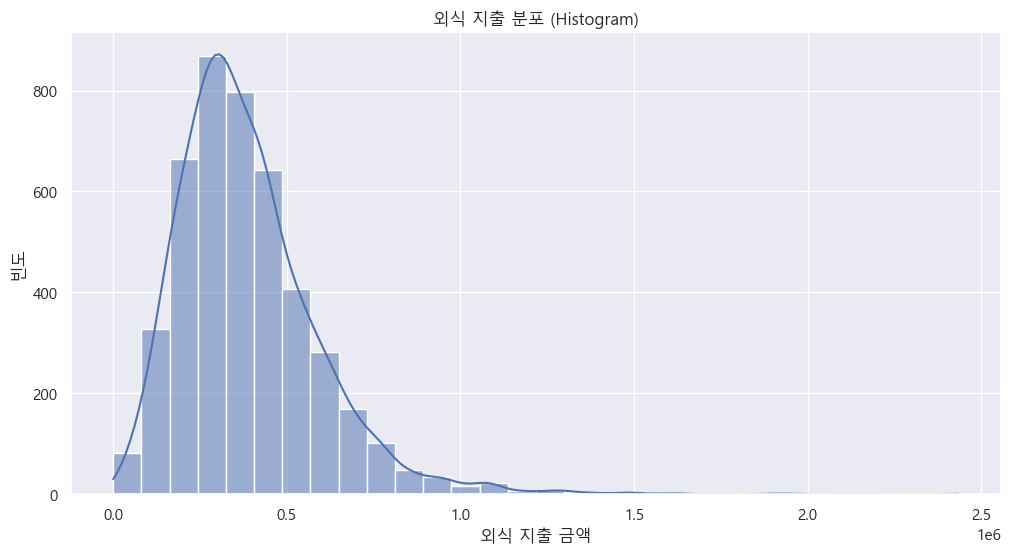

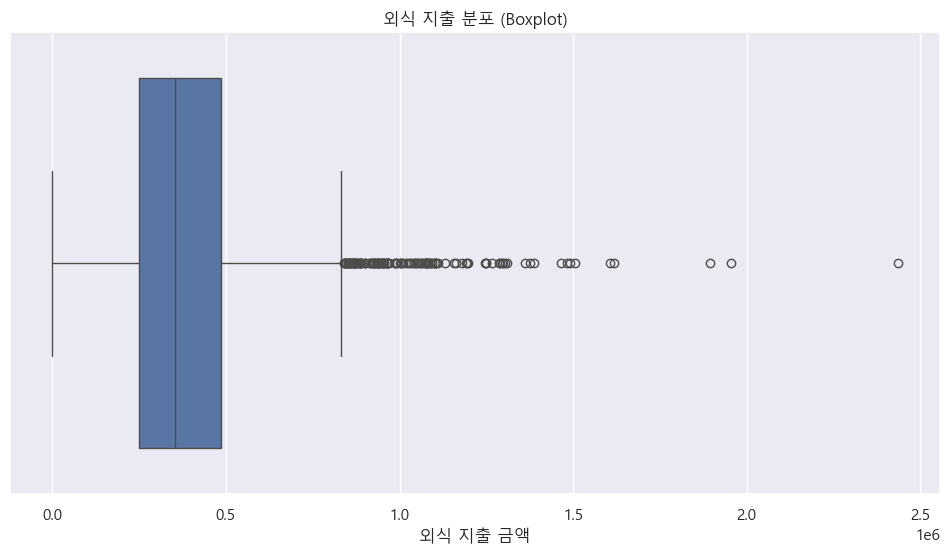

In [30]:
sns.histplot(young2['외식'], kde=True, bins=30)
plt.title('외식 지출 분포 (Histogram)')
plt.xlabel('외식 지출 금액')
plt.ylabel('빈도')
plt.show()

sns.boxplot(x=young2['외식'])
plt.title('외식 지출 분포 (Boxplot)')
plt.xlabel('외식 지출 금액')
plt.show()

# right skewed된 그래프..ㅠ
# 중앙값을 사용하여 분석 다시 시도

### 8. 중앙값으로 재분석

**기간별 외식지출 금액이 어떻게 증가하였는지 시각화**
- 8-1. 전체 기간별 외식지출 금액이 어떻게 변화하였는지 시각화
- 8-2. 연령층별 외식지출이 지난 5년 동안 어떻게 변화하였는지 시각화
- 8-3. 직업군별 외식지출이 지난 5년 동안 어떻게 변화하였는지 시각화
- 8-4. 소득액별 외식지출이 지난 5년 동안 어떻게 변화하였는지 시각화

#### 8-1. 전체 기간별 외식지출 금액이 어떻게 변화하였는지 시각화

In [31]:
# 조사연도별 외식비 계산 후 정수로 반올림
yearly_outfood = young2.groupby('조사연도')['외식'].median().round().astype(int).reset_index()
print(yearly_outfood)

   조사연도      외식
0  2019  325040
1  2020  311056
2  2021  324765
3  2022  356917
4  2023  374149
5  2024  405173


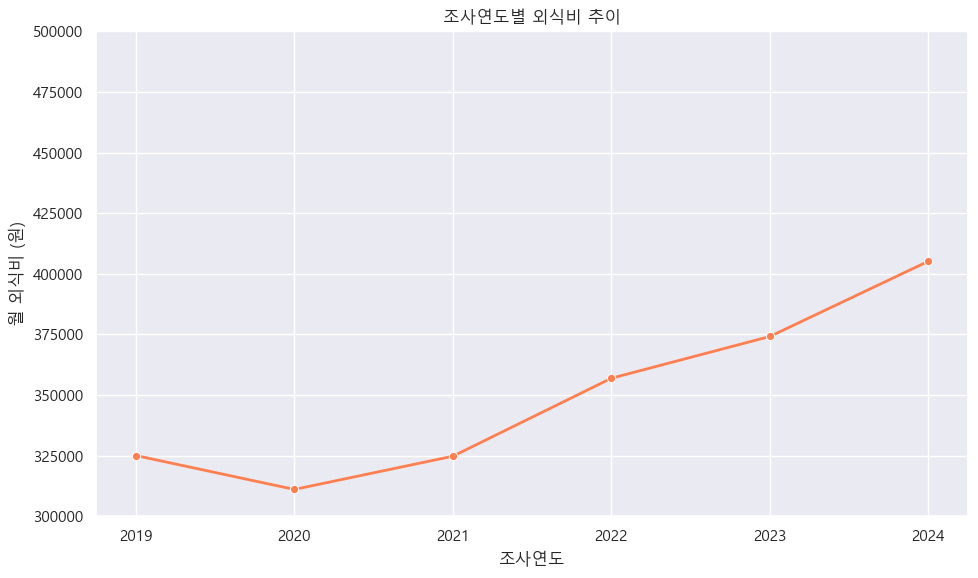

In [32]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_outfood, x='조사연도', y='외식', marker='o', linewidth=2, color = 'coral')

plt.title('조사연도별 외식비 추이')
plt.xlabel('조사연도')
plt.ylabel('월 외식비 (원)')

plt.ylim(300000, 500000)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 8-2. 연령층별 외식지출이 지난 5년 동안 어떻게 변화하였는지 시각화

In [33]:
age_outfood = young2.groupby(['조사연도', '연령그룹'])['외식'].median().round().astype(int).reset_index()
print(age_outfood)

    조사연도    연령그룹      외식
0   2019  30대 초반  370036
1   2019     대학생  273930
2   2019   사회초년생  325820
3   2020  30대 초반  338428
4   2020     대학생  292000
5   2020   사회초년생  310900
6   2021  30대 초반  346625
7   2021     대학생  286562
8   2021   사회초년생  328000
9   2022  30대 초반  358428
10  2022     대학생  320475
11  2022   사회초년생  365480
12  2023  30대 초반  381943
13  2023     대학생  337520
14  2023   사회초년생  392745
15  2024  30대 초반  433668
16  2024     대학생  329653
17  2024   사회초년생  405063


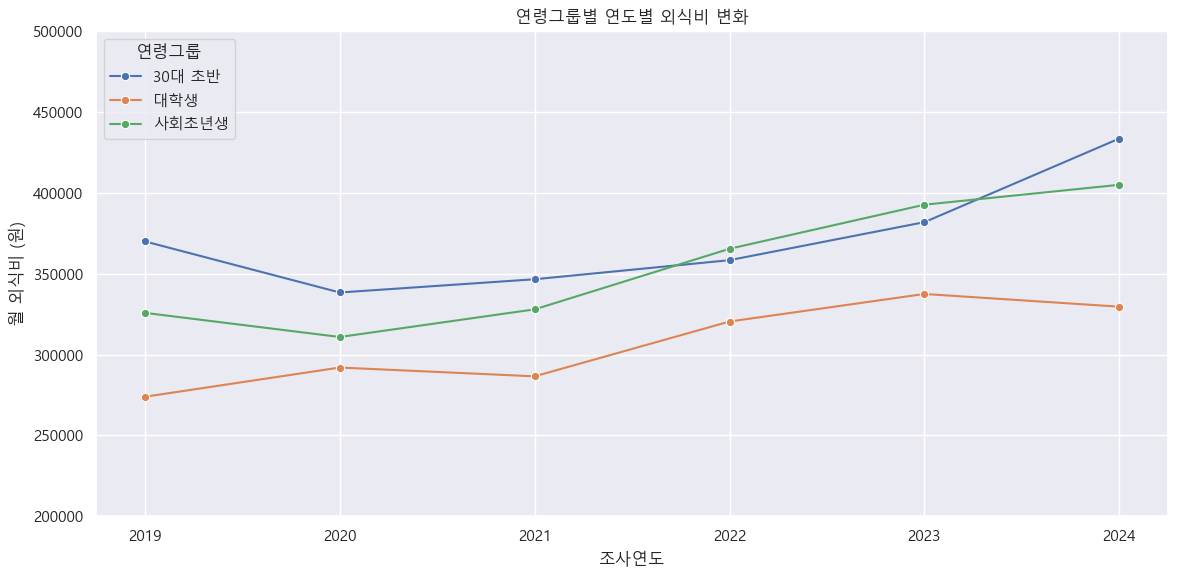

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_outfood, x='조사연도', y='외식', hue='연령그룹', marker='o')
plt.title('연령그룹별 연도별 외식비 변화')
plt.xlabel('조사연도')
plt.ylabel('월 외식비 (원)')
plt.ylim(200000, 500000)
plt.grid(True)
plt.legend(title='연령그룹')
plt.tight_layout()
plt.show()

#### 8-3. 직업군별 연도별 외식비 변화

In [35]:
job_outfood = young2.groupby(['조사연도', '직업군'])['외식'].median().dropna().round().astype(int).reset_index()
print(job_outfood)

    조사연도     직업군      외식
0   2019     사무직  307946
1   2019  서비스/판매  293959
2   2019   육체노동자  339517
3   2019     전문가  371245
4   2020     사무직  326533
5   2020  서비스/판매  304867
6   2020   육체노동자  297440
7   2020     전문가  313900
8   2021     사무직  336934
9   2021  서비스/판매  321000
10  2021   육체노동자  327926
11  2021     전문가  311404
12  2022     사무직  382200
13  2022  서비스/판매  333058
14  2022   육체노동자  355938
15  2022     전문가  359094
16  2023     사무직  386507
17  2023  서비스/판매  334642
18  2023   육체노동자  435006
19  2023     전문가  367530
20  2024     사무직  427255
21  2024  서비스/판매  337833
22  2024   육체노동자  407432
23  2024     전문가  414866


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\419937073.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_outfood = young2.groupby(['조사연도', '직업군'])['외식'].median().dropna().round().astype(int).reset_index()


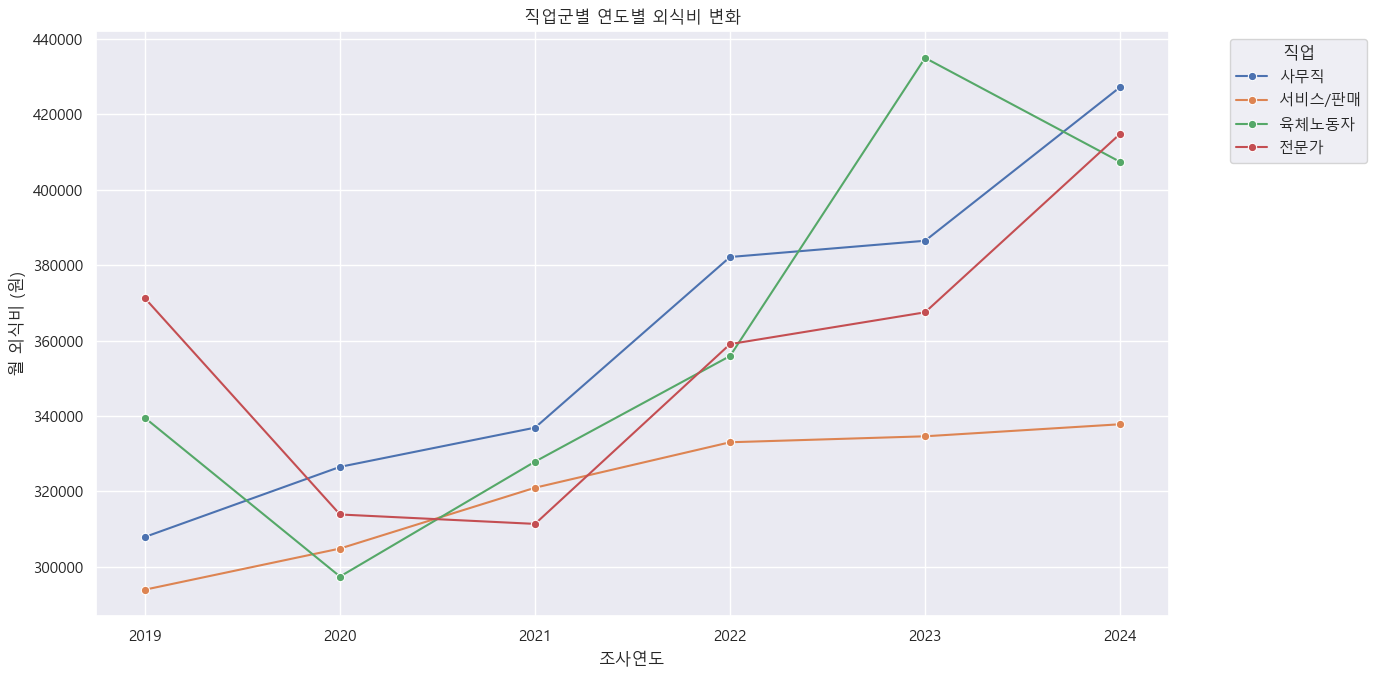

In [36]:
# 결측 평균값 제외하고 시각화
job_outfood_clean = job_outfood.dropna(subset=['외식'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=job_outfood_clean, x='조사연도', y='외식', hue='직업군', marker='o')
plt.title('직업군별 연도별 외식비 변화')
plt.xlabel('조사연도')
plt.ylabel('월 외식비 (원)')
plt.grid(True)
plt.legend(title='직업', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 8-4. 소득별 연도별 외식비 변화

In [37]:
income_outfood = young2.groupby(['조사연도', '소득군'], observed=True)['외식'].median().dropna().round().astype(int).reset_index()
print(income_outfood)

    조사연도           소득군      외식
0   2019  200-300만원 미만  319406
1   2019      200만원 미만  238230
2   2019  300-400만원 미만  406070
3   2019      400만원 이상  478625
4   2020  200-300만원 미만  301765
5   2020      200만원 미만  252812
6   2020  300-400만원 미만  332400
7   2020      400만원 이상  375994
8   2021  200-300만원 미만  317082
9   2021      200만원 미만  248068
10  2021  300-400만원 미만  367104
11  2021      400만원 이상  376602
12  2022  200-300만원 미만  332115
13  2022      200만원 미만  264430
14  2022  300-400만원 미만  383333
15  2022      400만원 이상  457285
16  2023  200-300만원 미만  331775
17  2023      200만원 미만  285380
18  2023  300-400만원 미만  381792
19  2023      400만원 이상  497625
20  2024  200-300만원 미만  367648
21  2024      200만원 미만  287516
22  2024  300-400만원 미만  423767
23  2024      400만원 이상  498548


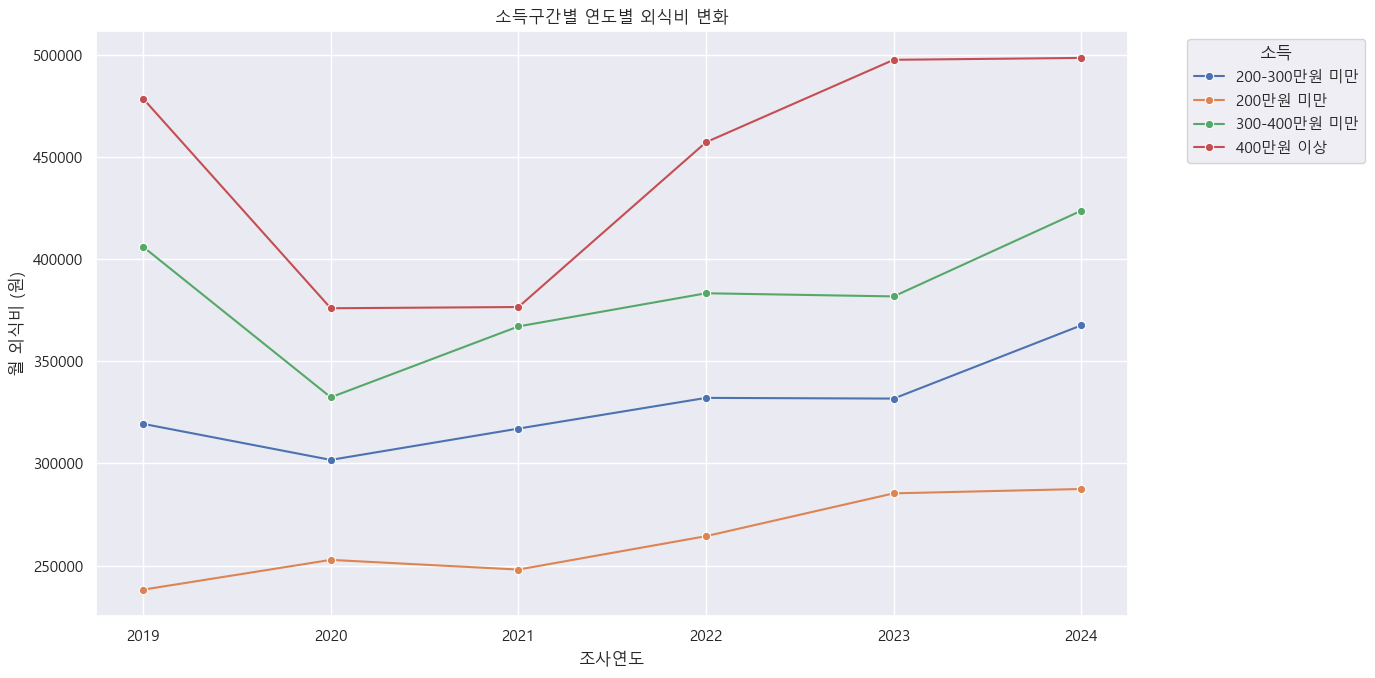

In [38]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=income_outfood, x='조사연도', y='외식', hue='소득군', marker='o')
plt.title('소득구간별 연도별 외식비 변화')
plt.xlabel('조사연도')
plt.ylabel('월 외식비 (원)')
plt.grid(True)
plt.legend(title='소득', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 7. 물가지수 데이터 확보
- 연도별 물가지수를 데이터프레임으로 정리하여 분석 데이터와 연동 가능하도록 준비
- 외식 지출 데이터셋에 조사연도별 물가지수를 merge

In [39]:
# CPI 데이터 프레임 생성
cpi_data = {
    '조사연도' : [2019, 2020, 2021, 2022, 2023, 2024],
    '물가지수' : [99.061, 100.0, 102.73, 110.53, 117.16, 120.77]
}

# 소수점 5자리까지 출력
pd.set_option('display.float_format', '{:.3f}'.format)

# DataFrame으로 변환
cpi = pd.DataFrame(cpi_data)

# 확인
print(cpi)


   조사연도    물가지수
0  2019  99.061
1  2020 100.000
2  2021 102.730
3  2022 110.530
4  2023 117.160
5  2024 120.770


In [40]:
# 기존에 존재하는 물가지수 관련 컬럼 삭제 (있으면 삭제)
drop_cols = [col for col in young2.columns if '물가지수' in col or 'cpi' in col]
young2 = young2.drop(columns=drop_cols, errors='ignore')

# CPI 데이터 병합
young2 = pd.merge(young2, cpi, on='조사연도', how='left')
young2

,가구원수,성별,나이,학력,직업,종사상지위,소득,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,외식+숙박,외식,가계지출_소비지출_음식숙박_숙박비,조사연도,연령그룹,직업군,소득군,물가지수
0,1,1,31,4,3,1.000,4,4968138,2845989,734800,279000,279000,0,2019,30대 초반,사무직,300-400만원 미만,99.061
1,1,1,34,5,3,1.000,5,4487267,1745827,74205,597385,597385,0,2019,30대 초반,사무직,400만원 이상,99.061
2,1,1,34,6,3,1.000,6,6129518,594445,37673,96133,96133,0,2019,30대 초반,사무직,400만원 이상,99.061
3,1,1,34,6,9,1.000,5,2721557,1029301,17913,435500,435500,0,2019,30대 초반,육체노동자,400만원 이상,99.061
4,1,1,19,4,3,1.000,3,2665048,1573323,53345,458255,458255,0,2019,대학생,사무직,200-300만원 미만,99.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,1,1,28,6,4,5.000,4,1220762,1190842,110312,119031,97150,21881,2024,사회초년생,서비스/판매,300-400만원 미만,120.770
4487,1,2,33,4,7,2.000,5,4680211,4153170,520295,1018823,987073,31750,2024,30대 초반,육체노동자,400만원 이상,120.770
4488,1,2,20,6,4,3.000,2,1307697,1307697,178515,99492,99492,0,2024,대학생,서비스/판매,200만원 미만,120.770
4489,1,2,28,5,3,1.000,3,1145116,589077,133465,99755,99755,0,2024,사회초년생,사무직,200-300만원 미만,120.770


### 9. 물가지수를 이용한 외식 지출 표준화 계산
- 실질외식지출 = 외식지출 × (100/ 해당연도 물가지수)
- 외식에서 실제로 지출한 금액(외식지출)을 물가상승률(해당연도 물가지수)로 조정하여 실질 구매력 기준의 외식지출을 계산하는 공식을 차용함.
- 물가지수가 높으면 같은 금액으로 살 수 있는 외식량이 줄어들면서 구매력이 감소하게 됨.
- 따라서 명목지출을 물가상승률로 나누어 기준연도(2020년)의 가치로 환산해야 함.

In [41]:
# 실질 외식지출 계산
young2['실질외식지출'] = young2['외식'] * (100 / young2['물가지수'])
#print(young2[['외식', '물가지수', '실질외식지출']])
# young2.head()

# 소수점 첫째자리에서 반올림
young2['실질외식지출'] = young2['실질외식지출'].round(0).astype(int)
print(young2[['외식', '실질외식지출']])

          외식  실질외식지출
0     279000  281645
1     597385  603048
2      96133   97044
3     435500  439628
4     458255  462599
...      ...     ...
4486   97150   80442
4487  987073  817316
4488   99492   82381
4489   99755   82599
4490   99783   82622

[4491 rows x 2 columns]


### 10. 시각화

#### 1. 연도별 '외식'과 '실질외식지출' 변화 비교

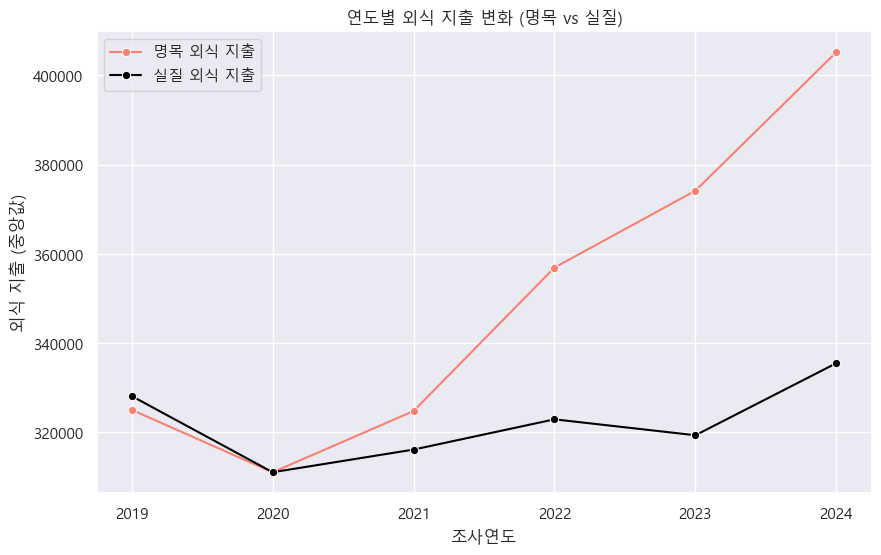

In [42]:
# 연도별 평균 계산
yearly_median = young2.groupby('조사연도')[['외식', '실질외식지출']].median().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_median, x='조사연도', y='외식', marker='o', label='명목 외식 지출', color = 'salmon')
sns.lineplot(data=yearly_median, x='조사연도', y='실질외식지출', marker='o', label='실질 외식 지출', color = 'black')
plt.title('연도별 외식 지출 변화 (명목 vs 실질)')
plt.ylabel('외식 지출 (중앙값)')
plt.xlabel('조사연도')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# 그래프에 사용된 실제 수치 데이터 출력
print(yearly_median.round().astype(int))


   조사연도      외식  실질외식지출
0  2019  325040  328121
1  2020  311056  311056
2  2021  324765  316135
3  2022  356917  322914
4  2023  374149  319348
5  2024  405173  335492


### 추가: 비율이 어떻게 달라졌는지
- 분모: 전체 소득
- 분자1 : 외식이 차지하는 지출 (명목지출)
- 분자2 : 외식이 차지하는 지출 (실질지출)

In [44]:
young2.head()

,가구원수,성별,나이,학력,직업,종사상지위,소득,가계지출금액,가계지출_소비지출금액,가계지출_소비지출_식료품비주류음료구입비,외식+숙박,외식,가계지출_소비지출_음식숙박_숙박비,조사연도,연령그룹,직업군,소득군,물가지수,실질외식지출
0,1,1,31,4,3,1.000,4,4968138,2845989,734800,279000,279000,0,2019,30대 초반,사무직,300-400만원 미만,99.061,281645
1,1,1,34,5,3,1.000,5,4487267,1745827,74205,597385,597385,0,2019,30대 초반,사무직,400만원 이상,99.061,603048
2,1,1,34,6,3,1.000,6,6129518,594445,37673,96133,96133,0,2019,30대 초반,사무직,400만원 이상,99.061,97044
3,1,1,34,6,9,1.000,5,2721557,1029301,17913,435500,435500,0,2019,30대 초반,육체노동자,400만원 이상,99.061,439628
4,1,1,19,4,3,1.000,3,2665048,1573323,53345,458255,458255,0,2019,대학생,사무직,200-300만원 미만,99.061,462599


   조사연도  명목외식비율  실질외식비율
0  2019   0.212   0.214
1  2020   0.214   0.214
2  2021   0.220   0.214
3  2022   0.226   0.205
4  2023   0.221   0.189
5  2024   0.226   0.187


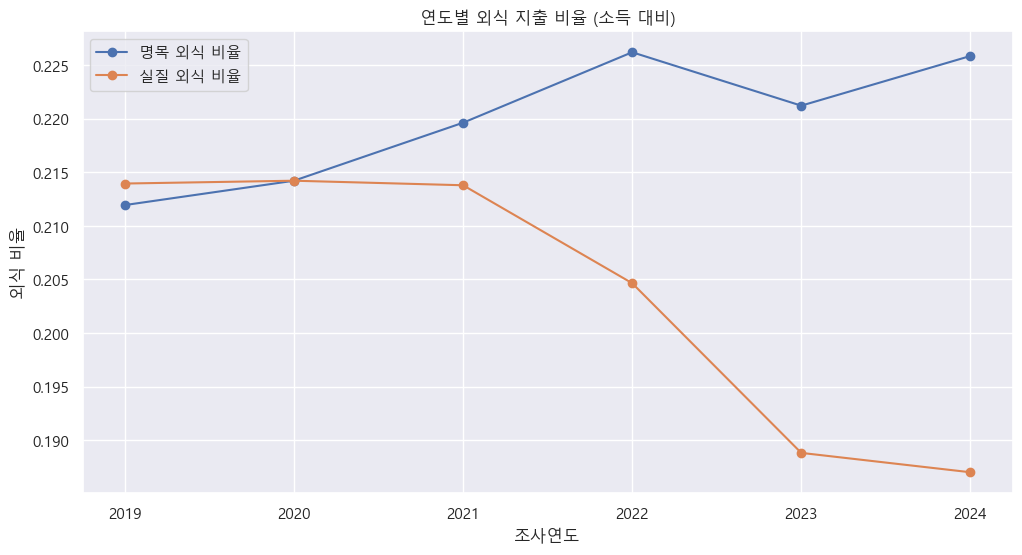

In [45]:
# 1. 연도별 평균 소득, 외식, 실질외식지출 계산
grouped = young2.groupby('조사연도')[['가계지출_소비지출금액', '외식', '실질외식지출']].median().reset_index()

# 2. 명목 외식 비율과 실질 외식 비율 계산
grouped['명목외식비율'] = grouped['외식'] / grouped['가계지출_소비지출금액']
grouped['실질외식비율'] = grouped['실질외식지출'] / grouped['가계지출_소비지출금액']

# 3. 결과 확인
print(grouped[['조사연도', '명목외식비율', '실질외식비율']])

plt.plot(grouped['조사연도'], grouped['명목외식비율'], marker='o', label='명목 외식 비율')
plt.plot(grouped['조사연도'], grouped['실질외식비율'], marker='o', label='실질 외식 비율')
plt.title('연도별 외식 지출 비율 (소득 대비)')
plt.xlabel('조사연도')
plt.ylabel('외식 비율')
plt.legend()
plt.grid(True)
plt.show()


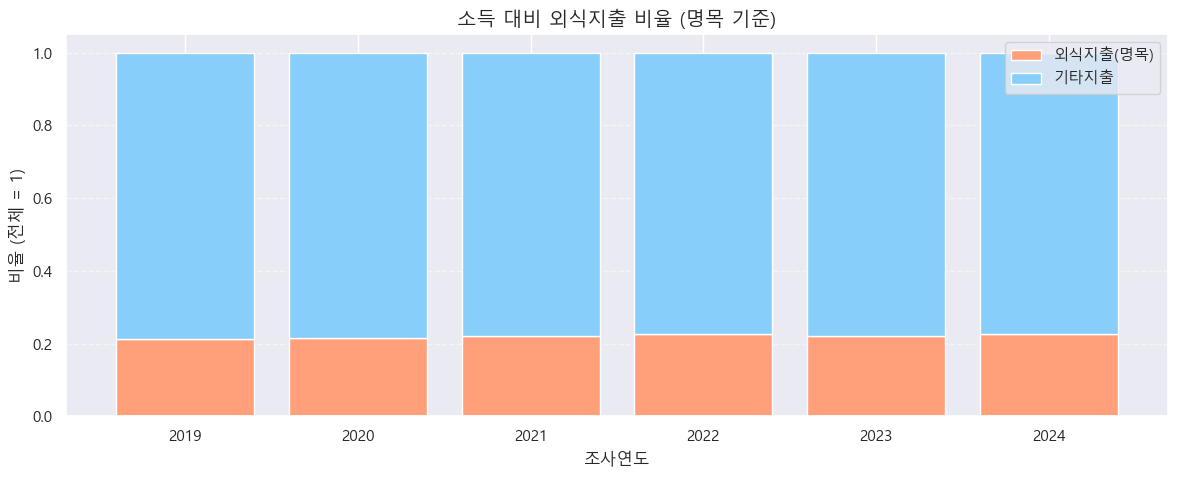

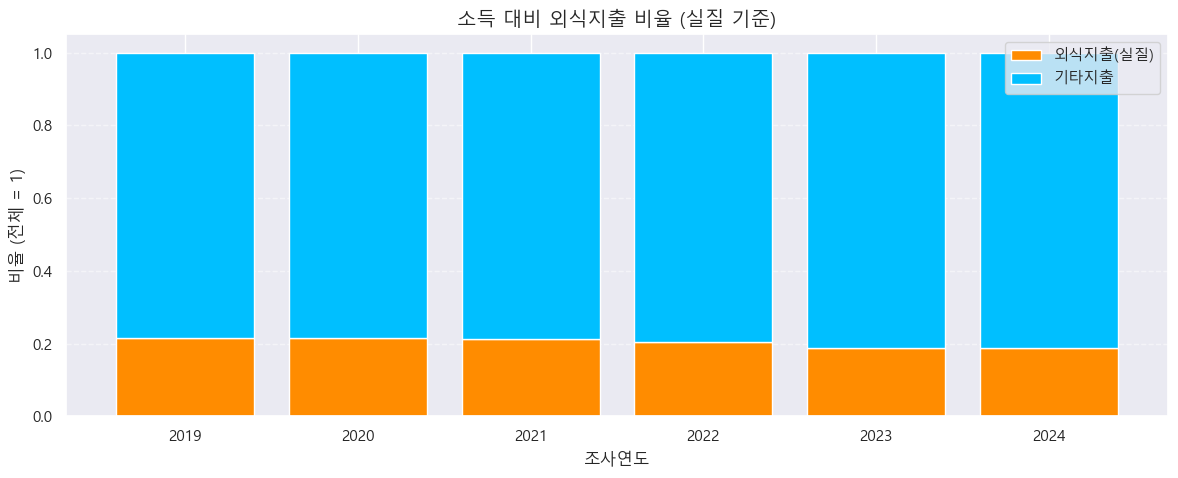

In [46]:
# 비율로 누적막대그래프 작성기


import matplotlib.pyplot as plt

# 1. 연도별 중앙값으로 외식 비율 계산
grouped = young2.groupby('조사연도')[['가계지출_소비지출금액', '외식', '실질외식지출']].median().reset_index()
grouped['명목외식비율'] = grouped['외식'] / grouped['가계지출_소비지출금액']
grouped['실질외식비율'] = grouped['실질외식지출'] / grouped['가계지출_소비지출금액']
grouped['기타지출비율_명목'] = 1 - grouped['명목외식비율']
grouped['기타지출비율_실질'] = 1 - grouped['실질외식비율']

# 2. 명목 기준 누적 막대그래프
plt.figure(figsize=(12, 5))
plt.bar(grouped['조사연도'], grouped['명목외식비율'], label='외식지출(명목)', color='#FFA07A')
plt.bar(grouped['조사연도'], grouped['기타지출비율_명목'], 
        bottom=grouped['명목외식비율'], label='기타지출', color='#87CEFA')
plt.title('소득 대비 외식지출 비율 (명목 기준)', fontsize=14)
plt.ylabel('비율 (전체 = 1)')
plt.xlabel('조사연도')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. 실질 기준 누적 막대그래프
plt.figure(figsize=(12, 5))
plt.bar(grouped['조사연도'], grouped['실질외식비율'], label='외식지출(실질)', color='#FF8C00')
plt.bar(grouped['조사연도'], grouped['기타지출비율_실질'], 
        bottom=grouped['실질외식비율'], label='기타지출', color='#00BFFF')
plt.title('소득 대비 외식지출 비율 (실질 기준)', fontsize=14)
plt.ylabel('비율 (전체 = 1)')
plt.xlabel('조사연도')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



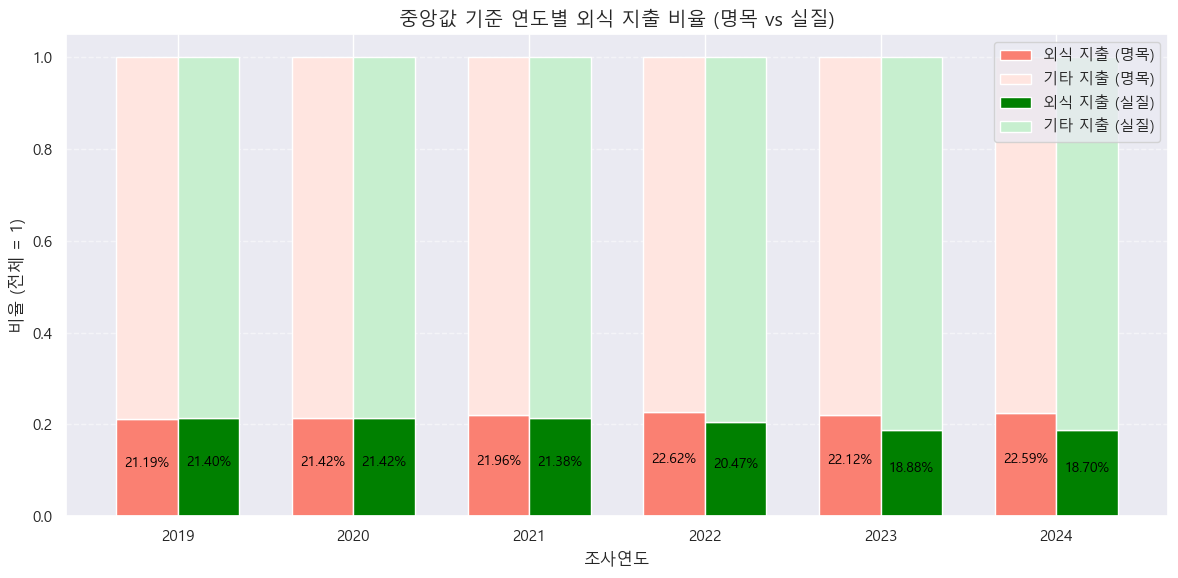

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 중앙값 기반 연도별 비율 계산
grouped = young2.groupby('조사연도')[['가계지출_소비지출금액', '외식', '실질외식지출']].median().reset_index()
grouped['명목외식비율'] = grouped['외식'] / grouped['가계지출_소비지출금액']
grouped['실질외식비율'] = grouped['실질외식지출'] / grouped['가계지출_소비지출금액']
grouped['명목기타'] = 1 - grouped['명목외식비율']
grouped['실질기타'] = 1 - grouped['실질외식비율']

# 2. 시각화 준비
x = np.arange(len(grouped))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# 명목 외식 지출 막대
bars1 = ax.bar(x - width/2, grouped['명목외식비율'], width, label='외식 지출 (명목)', color='salmon')
bars2 = ax.bar(x - width/2, grouped['명목기타'], width, bottom=grouped['명목외식비율'], label='기타 지출 (명목)', color='#FFE5E0')

# 실질 외식 지출 막대
bars3 = ax.bar(x + width/2, grouped['실질외식비율'], width, label='외식 지출 (실질)', color='green')
bars4 = ax.bar(x + width/2, grouped['실질기타'], width, bottom=grouped['실질외식비율'], label='기타 지출 (실질)', color='#C7EFCF')

# 3. 텍스트 라벨 함수
def label_bars(bars, values, offset=0.01):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2 + offset,
            f'{value:.2%}',  # 백분율 표기
            ha='center', va='center', fontsize=10, color='black'
        )

# 비율 값 텍스트 표시
label_bars(bars1, grouped['명목외식비율'])
label_bars(bars3, grouped['실질외식비율'])

# 4. 그래프 꾸미기
ax.set_ylabel('비율 (전체 = 1)', fontsize=12)
ax.set_xlabel('조사연도', fontsize=12)
ax.set_title('중앙값 기준 연도별 외식 지출 비율 (명목 vs 실질)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(grouped['조사연도'])
ax.set_ylim(0, 1.05)
ax.legend(loc='upper right')
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


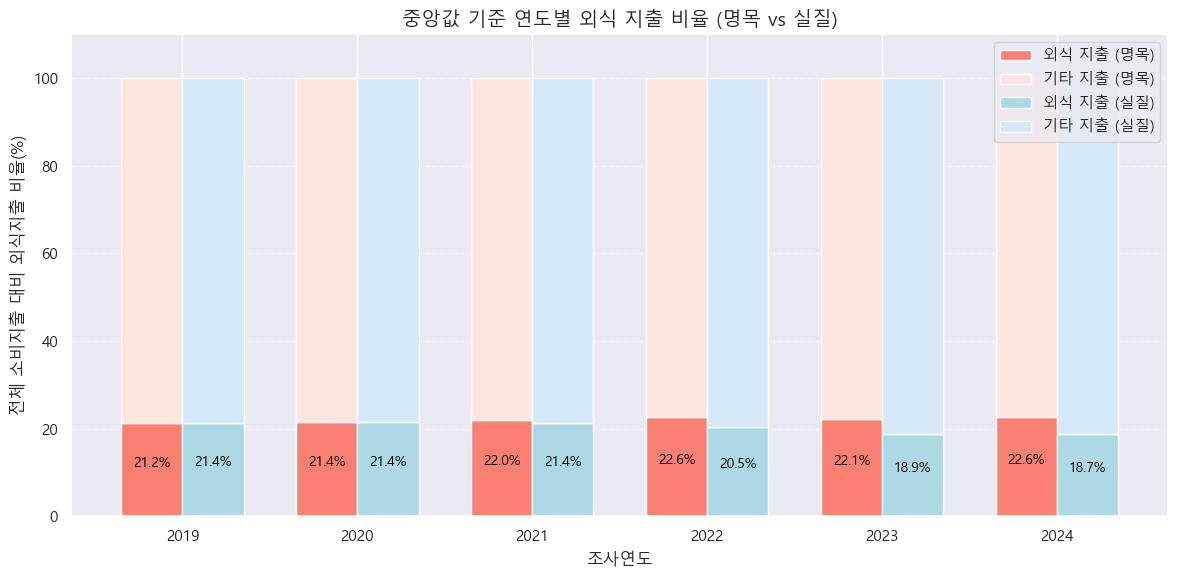

In [48]:
# y축을 퍼센트 단위로 변경
import numpy as np
import matplotlib.pyplot as plt

# 1. 중앙값 기준 연도별 외식 지출 비율 (퍼센트로 변환)
grouped = young2.groupby('조사연도')[['가계지출_소비지출금액', '외식', '실질외식지출']].median().reset_index()
grouped['명목외식비율'] = (grouped['외식'] / grouped['가계지출_소비지출금액']) * 100
grouped['실질외식비율'] = (grouped['실질외식지출'] / grouped['가계지출_소비지출금액']) * 100
grouped['명목기타'] = 100 - grouped['명목외식비율']
grouped['실질기타'] = 100 - grouped['실질외식비율']

# 2. 시각화
x = np.arange(len(grouped))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# 명목 외식 지출
bars1 = ax.bar(x - width/2, grouped['명목외식비율'], width, label='외식 지출 (명목)', color='salmon')
bars2 = ax.bar(x - width/2, grouped['명목기타'], width, bottom=grouped['명목외식비율'], label='기타 지출 (명목)', color='#FFE5E0')

# 실질 외식 지출
# 실질 외식 지출
bars3 = ax.bar(x + width/2, grouped['실질외식비율'], width, label='외식 지출 (실질)', color='lightblue')
bars4 = ax.bar(x + width/2, grouped['실질기타'], width, bottom=grouped['실질외식비율'], label='기타 지출 (실질)', color='#D6E9F8')

# 텍스트 라벨링
def label_bars(bars, values, offset=1.5):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2 + offset,
            f'{value:.1f}%',  # 퍼센트로 표기
            ha='center', va='center', fontsize=10, color='black'
        )

label_bars(bars1, grouped['명목외식비율'])
label_bars(bars3, grouped['실질외식비율'])

# 3. 축 및 제목 설정
ax.set_ylabel('전체 소비지출 대비 외식지출 비율(%)', fontsize=12)
ax.set_xlabel('조사연도', fontsize=12)
ax.set_title('중앙값 기준 연도별 외식 지출 비율 (명목 vs 실질)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(grouped['조사연도'])
ax.set_ylim(0, 110)
ax.legend(loc='upper right')
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


- 이 그래프는 중앙값을 기준으로 하여, 각 연도별 전체 소비지출에서 외식이 차지하는 비중을 명목금액과 실질금액(물가보정 후) 각각 비교한 것
- 명목 외식 지출: 전체 지출 대비 연도별로 미세하게 증가하는 폭이 있지만 전체소비에서 차지하는 비중이 절대적으로 증가하지는 않았음.
- 반면 실질외식지출의 비율이 감소했기 때문에 외식 빈도는 유지되거나 줄었을 수 있으며, 지출의 증가는 단순히 물가 상승 때문일 가능성이 높음.
- 즉 물가 상승으로 인해 지출이 늘어난 것이지, 청년들이 더 많이 외식하게 되었다고 단정할 수는 없

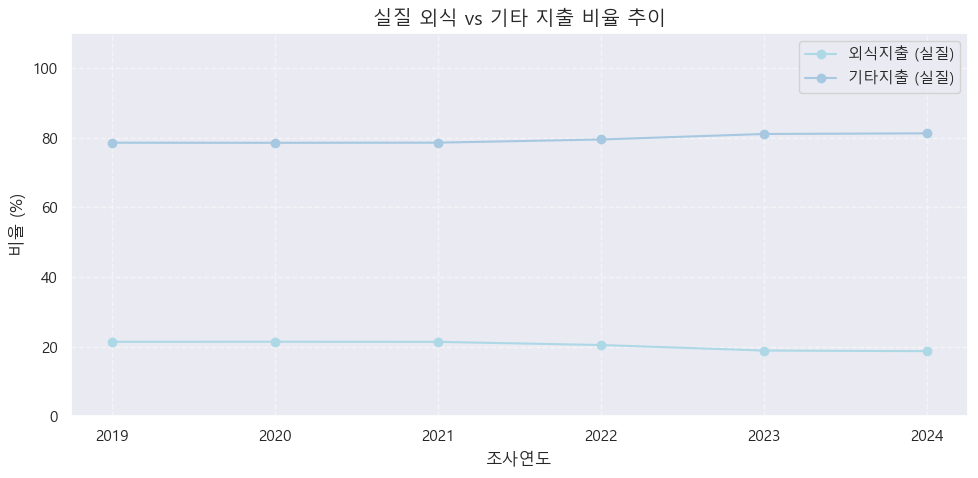

In [49]:
import matplotlib.pyplot as plt

# 선그래프: 실질 외식지출과 실질 기타지출 비율
plt.figure(figsize=(10, 5))
plt.plot(grouped['조사연도'], grouped['실질외식비율'], marker='o', color='lightblue', label='외식지출 (실질)')
plt.plot(grouped['조사연도'], grouped['실질기타'], marker='o', color='#A6C8E0', label='기타지출 (실질)')

plt.title('실질 외식 vs 기타 지출 비율 추이', fontsize=14)
plt.xlabel('조사연도', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.ylim(0, 110)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


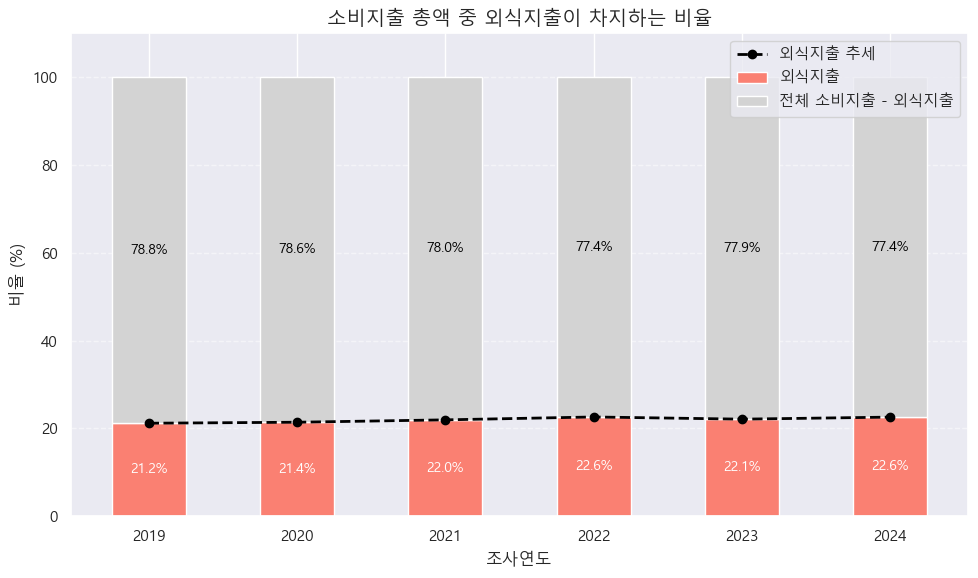

In [61]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(grouped))
width = 0.5

fig, ax = plt.subplots(figsize=(10, 6))

# 누적 막대그래프: 외식지출(살몬), 소비지출 총액(회색)
bars1 = ax.bar(x, grouped['명목외식비율'], width, label='외식지출', color='salmon')
bars2 = ax.bar(x, grouped['명목기타'], width, bottom=grouped['명목외식비율'], label='전체 소비지출 - 외식지출', color='lightgray')

# 외식지출 추세선 (검정색, 점선)
ax.plot(x, grouped['명목외식비율'], color='black', marker='o', linestyle='--', linewidth=2, label='외식지출 추세')

# 라벨링 (글자색 흰색 / 검정색)
for bar, val in zip(bars1, grouped['명목외식비율']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{val:.1f}%', ha='center', va='center', fontsize=10, color='white')

for bar, val, bottom in zip(bars2, grouped['명목기타'], grouped['명목외식비율']):
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=10, color='black')

# 축 및 제목 설정
ax.set_title('소비지출 총액 중 외식지출이 차지하는 비율', fontsize=14)
ax.set_xlabel('조사연도', fontsize=12)
ax.set_ylabel('비율 (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(grouped['조사연도'])
ax.set_ylim(0, 110)
ax.legend(loc='upper right')
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### 2. 연령그룹별 실질외식지출 변화

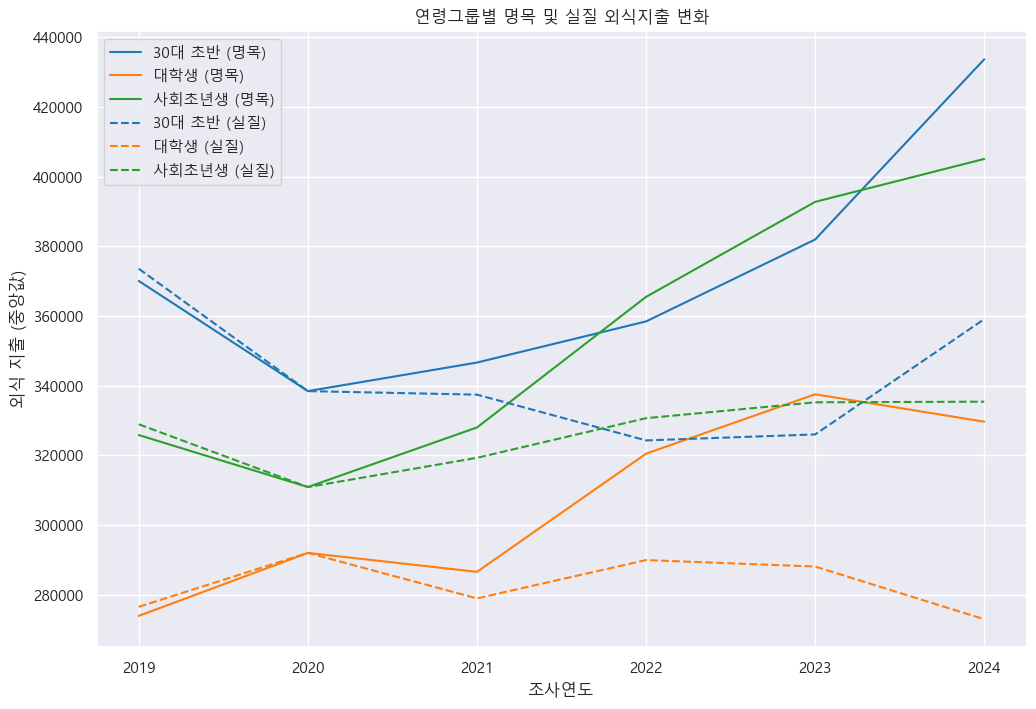

In [51]:
# 연령그룹별 연도별 명목, 실질 외식지출 평균 집계
age_group_median = young2.groupby(['조사연도', '연령그룹'])[['외식', '실질외식지출']].median().reset_index()

plt.figure(figsize=(12,8))

# 연령그룹별 색상 팔레트 생성
age_groups = age_group_median['연령그룹'].unique()
palette = sns.color_palette("tab10", n_colors=len(age_groups))
color_dict = dict(zip(age_groups, palette))

# 명목 외식지출 그리기 (실선)
for age in age_groups:
    subset = age_group_median[age_group_median['연령그룹'] == age]
    plt.plot(subset['조사연도'], subset['외식'], label=f'{age} (명목)', color=color_dict[age], linestyle='-')

# 실질 외식지출 그리기 (점선)
for age in age_groups:
    subset = age_group_median[age_group_median['연령그룹'] == age]
    plt.plot(subset['조사연도'], subset['실질외식지출'], label=f'{age} (실질)', color=color_dict[age], linestyle='--')

plt.title('연령그룹별 명목 및 실질 외식지출 변화')
plt.xlabel('조사연도')
plt.ylabel('외식 지출 (중앙값)')
plt.legend()
plt.grid(True)
plt.show()

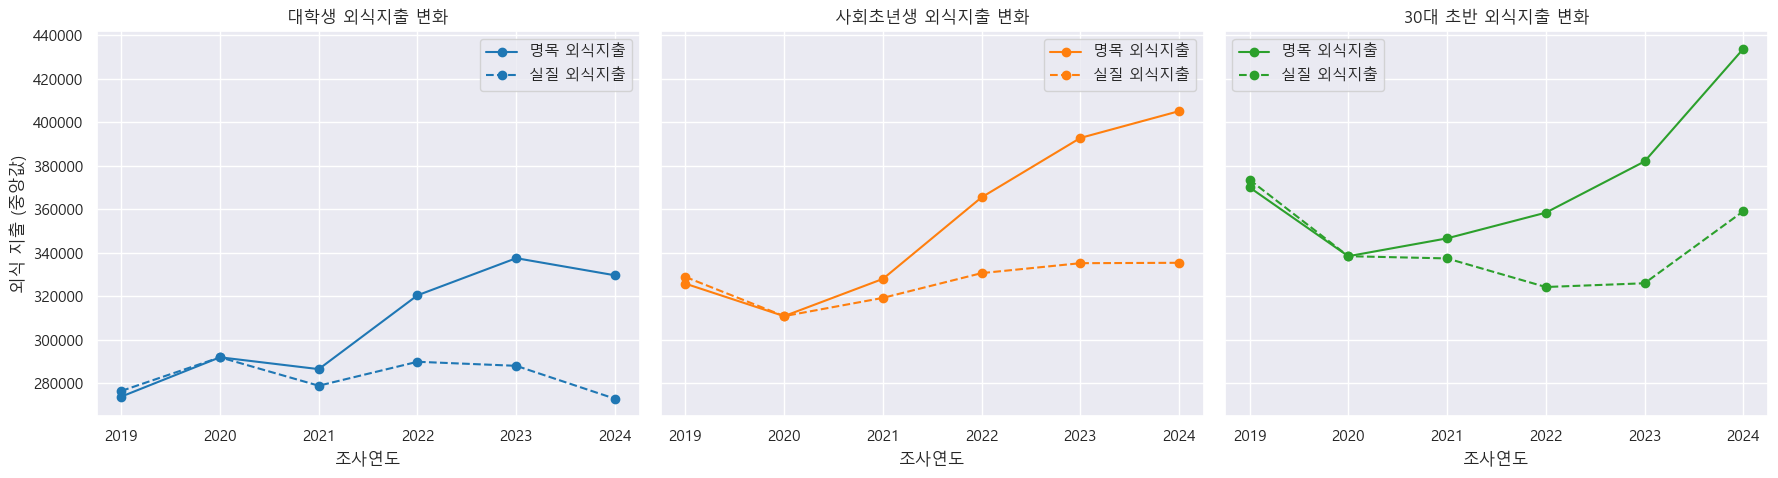

In [52]:
# 연령그룹 리스트 (대학생, 사회초년생, 30대 초반)
age_groups = ['대학생', '사회초년생', '30대 초반']
palette = sns.color_palette("tab10", n_colors=len(age_groups))
color_dict = dict(zip(age_groups, palette))

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, age in enumerate(age_groups):
    subset = age_group_median[age_group_median['연령그룹'] == age]
    color = color_dict[age]
    
    # 명목 외식지출 (실선)
    axes[i].plot(subset['조사연도'], subset['외식'], label='명목 외식지출', color=color, marker='o', linestyle='-')
    # 실질 외식지출 (점선)
    axes[i].plot(subset['조사연도'], subset['실질외식지출'], label='실질 외식지출', color=color, marker='o', linestyle='--')
    
    axes[i].set_title(f'{age} 외식지출 변화')
    axes[i].set_xlabel('조사연도')
    if i == 0:
        axes[i].set_ylabel('외식 지출 (중앙값)')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [53]:
# 연령그룹별 명목 외식지출과 실질 외식지출 평균 계산 후 반올림
age_group_table = young2.groupby(['연령그룹', '조사연도'])[['외식', '실질외식지출']].median().round(0).astype(int).reset_index()
print(age_group_table)


      연령그룹  조사연도      외식  실질외식지출
0   30대 초반  2019  370036  373544
1   30대 초반  2020  338428  338428
2   30대 초반  2021  346625  337414
3   30대 초반  2022  358428  324280
4   30대 초반  2023  381943  326002
5   30대 초반  2024  433668  359086
6      대학생  2019  273930  276526
7      대학생  2020  292000  292000
8      대학생  2021  286562  278947
9      대학생  2022  320475  289944
10     대학생  2023  337520  288085
11     대학생  2024  329653  272959
12   사회초년생  2019  325820  328908
13   사회초년생  2020  310900  310900
14   사회초년생  2021  328000  319284
15   사회초년생  2022  365480  330661
16   사회초년생  2023  392745  335221
17   사회초년생  2024  405063  335400


#### 3. 직업군별

C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\1723479587.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = young2.groupby(['직업군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\1723479587.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = young2.groupby(['직업군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\1723479587.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain

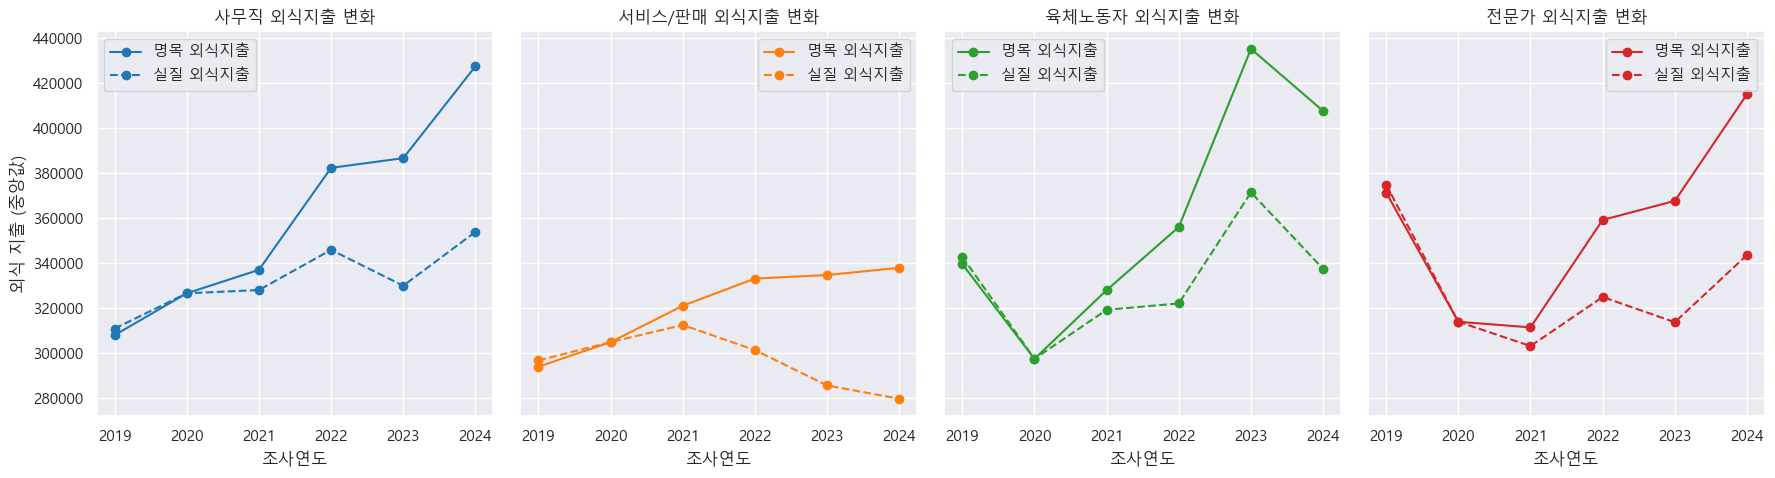

In [54]:
# 직업군 리스트 및 색상 지정
job_groups = young2['직업군'].cat.categories.tolist()
palette_job = sns.color_palette("tab10", n_colors=len(job_groups))
color_dict_job = dict(zip(job_groups, palette_job))

fig, axes = plt.subplots(1, len(job_groups), figsize=(18, 5), sharey=True)

for i, job in enumerate(job_groups):
    subset = young2.groupby(['직업군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()
    subset_job = subset[subset['직업군'] == job]
    color = color_dict_job[job]
    
    axes[i].plot(subset_job['조사연도'], subset_job['외식'], label='명목 외식지출', color=color, marker='o', linestyle='-')
    axes[i].plot(subset_job['조사연도'], subset_job['실질외식지출'], label='실질 외식지출', color=color, marker='o', linestyle='--')
    
    axes[i].set_title(f'{job} 외식지출 변화')
    axes[i].set_xlabel('조사연도')
    if i == 0:
        axes[i].set_ylabel('외식 지출 (중앙값)')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [55]:
# 직업군별·연도별 명목 및 실질 외식지출 평균 계산
subset = young2.groupby(['직업군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()

# 반올림 및 정수형 변환
subset_rounded = subset.copy()
subset_rounded['외식'] = subset_rounded['외식'].round().astype(int)
subset_rounded['실질외식지출'] = subset_rounded['실질외식지출'].round().astype(int)

# 결과 출력
print(subset_rounded)


       직업군  조사연도      외식  실질외식지출
0      사무직  2019  307946  310865
1      사무직  2020  326533  326533
2      사무직  2021  336934  327980
3      사무직  2022  382200  345788
4      사무직  2023  386507  329897
5      사무직  2024  427255  353776
6   서비스/판매  2019  293959  296745
7   서비스/판매  2020  304867  304867
8   서비스/판매  2021  321000  312470
9   서비스/판매  2022  333058  301328
10  서비스/판매  2023  334642  285628
11  서비스/판매  2024  337833  279733
12   육체노동자  2019  339517  342736
13   육체노동자  2020  297440  297440
14   육체노동자  2021  327926  319212
15   육체노동자  2022  355938  322028
16   육체노동자  2023  435006  371292
17   육체노동자  2024  407432  337362
18     전문가  2019  371245  374764
19     전문가  2020  313900  313900
20     전문가  2021  311404  303128
21     전문가  2022  359094  324884
22     전문가  2023  367530  313700
23     전문가  2024  414866  343517


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\2664419170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = young2.groupby(['직업군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()


#### 4. 소득군별 외식지출 변화

C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\3472915713.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = young2.groupby(['소득군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\3472915713.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = young2.groupby(['소득군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()
C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\3472915713.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain

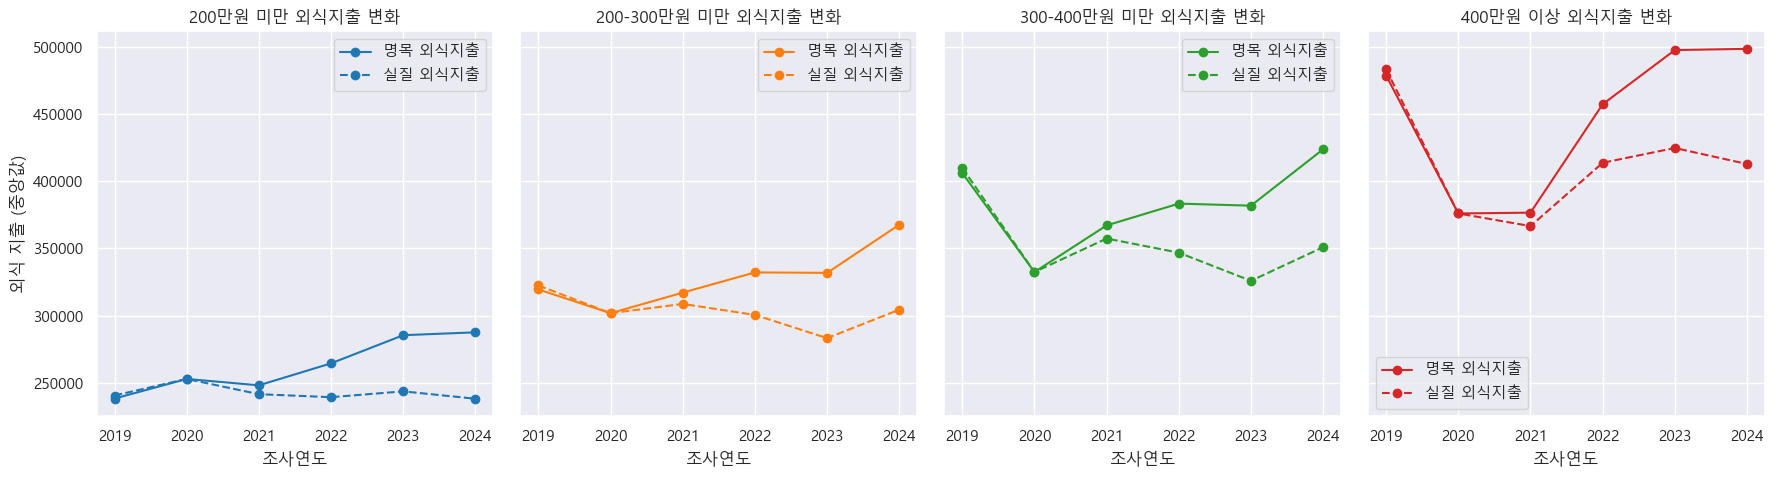

In [56]:
# 기존 순서에서 1번과 2번의 순서 수동 조정
income_groups = ['200만원 미만', '200-300만원 미만', '300-400만원 미만', '400만원 이상']
palette_income = sns.color_palette("tab10", n_colors=len(income_groups))
color_dict_income = dict(zip(income_groups, palette_income))

fig, axes = plt.subplots(1, len(income_groups), figsize=(18, 5), sharey=True)

for i, income in enumerate(income_groups):
    subset = young2.groupby(['소득군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()
    subset_income = subset[subset['소득군'] == income]
    color = color_dict_income[income]
    
    axes[i].plot(subset_income['조사연도'], subset_income['외식'], label='명목 외식지출', color=color, marker='o', linestyle='-')
    axes[i].plot(subset_income['조사연도'], subset_income['실질외식지출'], label='실질 외식지출', color=color, marker='o', linestyle='--')
    
    axes[i].set_title(f'{income} 외식지출 변화')
    axes[i].set_xlabel('조사연도')
    if i == 0:
        axes[i].set_ylabel('외식 지출 (중앙값)')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [57]:
# 직업군별·연도별 명목 및 실질 외식지출 평균 계산
subset = young2.groupby(['소득군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()

# 반올림 및 정수형 변환
subset_rounded = subset.copy()
subset_rounded['외식'] = subset_rounded['외식'].round().astype(int)
subset_rounded['실질외식지출'] = subset_rounded['실질외식지출'].round().astype(int)

# 결과 출력
print(subset_rounded)


             소득군  조사연도      외식  실질외식지출
0   200-300만원 미만  2019  319406  322433
1   200-300만원 미만  2020  301765  301765
2   200-300만원 미만  2021  317082  308656
3   200-300만원 미만  2022  332115  300475
4   200-300만원 미만  2023  331775  283181
5   200-300만원 미만  2024  367648  304420
6       200만원 미만  2019  238230  240488
7       200만원 미만  2020  252812  252812
8       200만원 미만  2021  248068  241476
9       200만원 미만  2022  264430  239238
10      200만원 미만  2023  285380  243581
11      200만원 미만  2024  287516  238070
12  300-400만원 미만  2019  406070  409919
13  300-400만원 미만  2020  332400  332400
14  300-400만원 미만  2021  367104  357349
15  300-400만원 미만  2022  383333  346814
16  300-400만원 미만  2023  381792  325872
17  300-400만원 미만  2024  423767  350888
18      400만원 이상  2019  478625  483162
19      400만원 이상  2020  375994  375994
20      400만원 이상  2021  376602  366594
21      400만원 이상  2022  457285  413720
22      400만원 이상  2023  497625  424740
23      400만원 이상  2024  498548  412808


C:\Users\Tammy Kim\AppData\Local\Temp\ipykernel_20696\1952086244.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subset = young2.groupby(['소득군', '조사연도'])[['외식', '실질외식지출']].median().reset_index()


### 10. 최종비교

In [58]:

# 외식지출과 실질 외식지출의 차이 열 생성 (반올림하여 정수 처리)
young2['외식지출_차이'] = (young2['외식'] - young2['실질외식지출']).round().astype(int)

# 결과 확인
print(young2[['조사연도', '외식', '실질외식지출', '외식지출_차이']])


      조사연도      외식  실질외식지출  외식지출_차이
0     2019  279000  281645    -2645
1     2019  597385  603048    -5663
2     2019   96133   97044     -911
3     2019  435500  439628    -4128
4     2019  458255  462599    -4344
...    ...     ...     ...      ...
4486  2024   97150   80442    16708
4487  2024  987073  817316   169757
4488  2024   99492   82381    17111
4489  2024   99755   82599    17156
4490  2024   99783   82622    17161

[4491 rows x 4 columns]


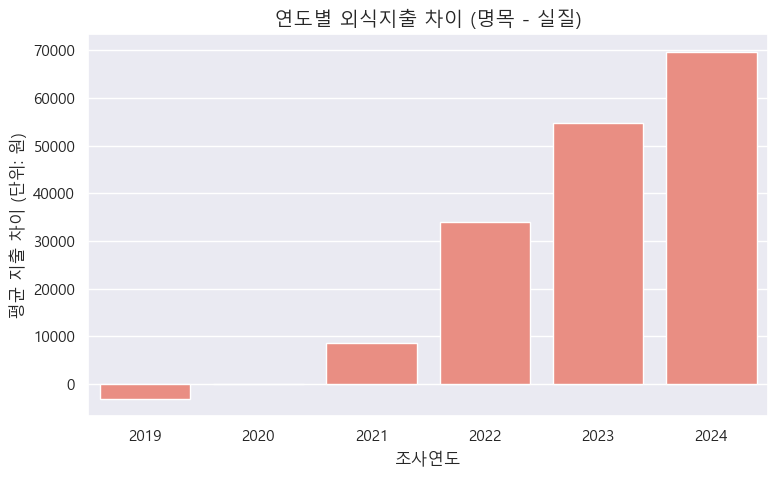

In [59]:
# 연도별 차이 계산
yearly_diff = young2.groupby('조사연도')['외식지출_차이'].median().round()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=yearly_diff.index, y=yearly_diff.values, color='salmon')
plt.title('연도별 외식지출 차이 (명목 - 실질)', fontsize=14)
plt.xlabel('조사연도')
plt.ylabel('평균 지출 차이 (단위: 원)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
